In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
league_of_legends_df=pd.read_csv("sqlite_report_performance.csv")

In [3]:
import random

# Calculate the number of rows to select (5% of the total entries)
sample_size = int(0.35 * len(league_of_legends_df))

# Randomly select 5% of the entries
random_sample = league_of_legends_df.sample(n=sample_size, random_state=42)  # Set random_state for reproducibility
league_of_legends_df = random_sample

In [4]:
league_of_legends_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485400 entries, 74110 to 1339764
Columns: 113 entries, Unnamed: 0 to calculated_player_performance
dtypes: float64(104), int64(1), object(8)
memory usage: 422.2+ MB


In [5]:
league_of_legends_df.describe()

Unnamed: 0        assists     baronKills    bountyLevel  \
count  4.854000e+05  485400.000000  485400.000000  485400.000000   
mean   6.942217e+05       7.875740       0.093533       1.035958   
std    3.999713e+05       5.735242       0.320616       2.094133   
min    2.000000e+00       0.000000       0.000000       0.000000   
25%    3.485368e+05       4.000000       0.000000       0.000000   
50%    6.941165e+05       7.000000       0.000000       0.000000   
75%    1.040513e+06      11.000000       0.000000       1.000000   
max    1.386856e+06      51.000000       4.000000      31.000000   

       champExperience     champLevel    championId  championTransform  \
count    485400.000000  485400.000000  4.854000e+05      485400.000000   
mean      11903.605979      13.489903  4.397974e+05           0.017693   
std        4202.662246       2.814754  4.037417e+06           0.174131   
min           0.000000       1.000000  1.000000e+00           0.000000   
25%        9039.000000      12.000000  5.300000e+01           0.000000   
50%       11777.000000      14.000000  1.060000e+02           0.000000   
75%       14621.000000      15.000000  2.220000e+02           0.000000   
max       35045.000000      18.000000  3.820807e+07           2.000000   

       consumablesPurchased  damageDealtToBuildings  ...    wardsPlaced  \
count         485400.000000           481284.000000  ...  485400.000000   
mean               4.708028             2631.008450  ...      10.978842   
std                3.631150             3259.867797  ...       9.659767   
min                0.000000                0.000000  ...       0.000000   
25%                2.000000              345.000000  ...       5.000000   
50%                4.000000             1535.000000  ...       8.000000   
75%                6.000000             3775.000000  ...      13.000000   
max              226.000000            57393.000000  ...     436.000000   

                 win  match_identifier       duration             f1  \
count  485400.000000      4.854000e+05  485400.000000  485400.000000   
mean        0.498828      3.362443e+09     250.595168       0.199805   
std         0.499999      1.620165e+09    2514.086255       0.107369   
min         0.000000      2.694504e+08       1.021583       0.000000   
25%         0.000000      2.301051e+09      22.614000       0.125195   
50%         0.000000      2.696450e+09      26.937533       0.194551   
75%         1.000000      5.312656e+09      31.320650       0.267908   
max         1.000000      6.487825e+09   50003.266667       1.184063   

                  f2             f3             f4             f5  \
count  485400.000000  485400.000000  485400.000000  485400.000000   
mean        0.479933       0.511288    3947.299318     381.447441   
std         0.247917       0.094076    2088.768879      98.629538   
min         0.000000       0.000038       0.000000       0.140662   
25%         0.302522       0.461970    2573.749327     314.841333   
50%         0.464010       0.506062    4138.622259     378.697435   
75%         0.638934       0.556946    5337.630106     444.106195   
max         3.678832       1.851714   19691.320144    1132.800000   

       calculated_player_performance  
count                  485400.000000  
mean                       49.241443  
std                        22.372362  
min                      -112.560000  
25%                        33.640000  
50%                        49.140000  
75%                        65.050000  
max                       227.950000  

[8 rows x 105 columns]

In [6]:
league_of_legends_df.shape

(485400, 113)

In [7]:
columns = league_of_legends_df.columns.tolist()
for i in columns:
    print(league_of_legends_df[i].value_counts)
    


<bound method IndexOpsMixin.value_counts of 74110        74110
917047      917047
200050      200050
175631      175631
1250451    1250451
            ...   
1140190    1140190
142037      142037
1054286    1054286
302211      302211
1339764    1339764
Name: Unnamed: 0, Length: 485400, dtype: int64>
<bound method IndexOpsMixin.value_counts of 74110       7.0
917047      4.0
200050      3.0
175631     23.0
1250451     0.0
           ... 
1140190     4.0
142037     10.0
1054286     1.0
302211     14.0
1339764     0.0
Name: assists, Length: 485400, dtype: float64>
<bound method IndexOpsMixin.value_counts of 74110      0.0
917047     0.0
200050     0.0
175631     0.0
1250451    0.0
          ... 
1140190    0.0
142037     0.0
1054286    0.0
302211     0.0
1339764    0.0
Name: baronKills, Length: 485400, dtype: float64>
<bound method IndexOpsMixin.value_counts of 74110      0.0
917047     0.0
200050     0.0
175631     3.0
1250451    0.0
          ... 
1140190    9.0
142037     0.0
1054286  

In [8]:
league_of_legends_df.columns

Index(['Unnamed: 0', 'assists', 'baronKills', 'bountyLevel', 'champExperience',
       'champLevel', 'championId', 'championName', 'championTransform',
       'consumablesPurchased',
       ...
       'wardsPlaced', 'win', 'match_identifier', 'duration', 'f1', 'f2', 'f3',
       'f4', 'f5', 'calculated_player_performance'],
      dtype='object', length=113)

In [9]:
if(len(league_of_legends_df.describe().columns) !=  len(league_of_legends_df.columns)):
    print("categorical variables found")
league_of_legends_df.dtypes

categorical variables found


Unnamed: 0                         int64
assists                          float64
baronKills                       float64
bountyLevel                      float64
champExperience                  float64
                                  ...   
f2                               float64
f3                               float64
f4                               float64
f5                               float64
calculated_player_performance    float64
Length: 113, dtype: object

In [10]:
league_of_legends_df.select_dtypes(include=['object']).columns

Index(['championName', 'individualPosition', 'lane', 'puuid', 'role',
       'summonerId', 'summonerName', 'teamPosition'],
      dtype='object')

In [11]:
# knowing with a  knowlege of the game that individual puuid  summonerId and summonerName dosen't have any imapact on the performance of the player

league_of_legends_df.drop(['Unnamed: 0','summonerId','summonerName','puuid'],axis=1,inplace=True)

In [12]:
league_of_legends_df.head(10)

assists  baronKills  bountyLevel  champExperience  champLevel  \
74110        7.0         0.0          0.0          11748.0        14.0   
917047       4.0         0.0          0.0           9517.0        12.0   
200050       3.0         0.0          0.0           8963.0        12.0   
175631      23.0         0.0          3.0          12063.0        14.0   
1250451      0.0         0.0          0.0          13875.0        15.0   
1187567     11.0         0.0          0.0          28559.0        18.0   
229514       7.0         0.0          2.0          10586.0        13.0   
836991       3.0         0.0          0.0          14072.0        15.0   
284283      14.0         0.0          1.0          12161.0        14.0   
688029       3.0         0.0          0.0          14110.0        15.0   

         championId championName  championTransform  consumablesPurchased  \
74110         110.0        Varus                0.0                   3.0   
917047        163.0      Taliyah                0.0                   0.0   
200050         22.0         Ashe                0.0                   8.0   
175631        497.0        Rakan                0.0                   6.0   
1250451        14.0         Sion                0.0                   2.0   
1187567        14.0         Sion                0.0                   5.0   
229514        887.0         Gwen                0.0                   3.0   
836991        102.0      Shyvana                0.0                   3.0   
284283        497.0        Rakan                0.0                  13.0   
688029         13.0         Ryze                0.0                  10.0   

         damageDealtToBuildings  ...  wardsPlaced  win  match_identifier  \
74110                    1582.0  ...          9.0  0.0      1.104376e+09   
917047                   1608.0  ...          1.0  1.0      5.286742e+09   
200050                    849.0  ...         12.0  0.0      2.320295e+09   
175631                   3991.0  ...         30.0  1.0      2.328755e+09   
1250451                  2942.0  ...          9.0  0.0      6.235624e+09   
1187567                  6416.0  ...         10.0  1.0      1.291119e+09   
229514                    420.0  ...          4.0  0.0      1.043565e+09   
836991                      0.0  ...          4.0  0.0      2.324204e+09   
284283                    165.0  ...         34.0  1.0      2.892019e+09   
688029                   1218.0  ...         16.0  0.0      2.301656e+09   

          duration        f1        f2        f3           f4          f5  \
74110    29.521233  0.338739  0.541983  0.474235  3689.818741  355.574575   
917047   18.827167  0.212459  0.424918  0.637377  6704.885671  447.279198   
200050   23.984350  0.083388  0.250163  0.500326  4379.272317  361.902657   
175631   26.149133  0.000000  0.994297  0.535391  1003.130760  318.633887   
1250451  29.183333  0.376927  0.068532  0.513992  4644.294689  332.552827   
1187567  41.183333  0.267098  0.558478  0.437070  9836.454877  545.730473   
229514   24.401467  0.286868  0.450793  0.532755  4743.198496  374.649611   
836991   29.565417  0.236763  0.304410  0.507350  6854.833209  420.017757   
284283   32.827800  0.152310  0.456930  0.426468   580.575000  246.924862   
688029   30.037767  0.166457  0.299623  0.499371  6087.536468  394.470073   

         calculated_player_performance  
74110                            30.41  
917047                           52.67  
200050                           55.84  
175631                           96.81  
1250451                           5.97  
1187567                          50.67  
229514                           36.96  
836991                           40.28  
284283                           46.86  
688029                           48.67  

[10 rows x 109 columns]

In [13]:
missing_values = league_of_legends_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

In [14]:
print(league_of_legends_df["championName"].value_counts())
league_of_legends_df["championId"].value_counts()

Ezreal     12610
LeeSin     10951
Kaisa       9830
Thresh      9030
Lulu        7994
           ...  
Renata       453
Vex          409
Belveth      372
Milio        330
Nilah        186
Name: championName, Length: 163, dtype: int64


81.0          12526
64.0          10872
145.0          9624
412.0          8928
234.0          7926
              ...  
37880385.0        9
37945922.0        5
38142533.0        2
38208070.0        1
38011459.0        1
Name: championId, Length: 178, dtype: int64

In [15]:
# we can see that there is a probleme with the championId column so we will drop it and we will create another one
league_of_legends_df.drop(['championId'],axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
league_of_legends_df['championId'] = label_encoder.fit_transform(league_of_legends_df['championName'])

In [17]:
league_of_legends_df["championId"].value_counts()

29     12610
66     10951
52      9830
130     9030
71      7994
       ...  
102      453
142      409
13       372
77       330
87       186
Name: championId, Length: 163, dtype: int64

In [18]:
league_of_legends_df.drop(['championName'],axis=1,inplace=True)

In [19]:
league_of_legends_df["teamPosition"].value_counts()

TOP        97691
JUNGLE     96786
BOTTOM     96733
MIDDLE     96438
UTILITY    96242
Name: teamPosition, dtype: int64

In [20]:
league_of_legends_df["individualPosition"].value_counts()

JUNGLE     98177
TOP        97506
BOTTOM     96491
MIDDLE     96178
UTILITY    95579
Invalid     1469
Name: individualPosition, dtype: int64

In [21]:
league_of_legends_df = league_of_legends_df[league_of_legends_df['individualPosition'] != 'Invalid']

In [22]:
league_of_legends_df["individualPosition"].value_counts()

JUNGLE     98177
TOP        97506
BOTTOM     96491
MIDDLE     96178
UTILITY    95579
Name: individualPosition, dtype: int64

In [23]:
league_of_legends_df["lane"].value_counts()

BOTTOM    152932
MIDDLE     92645
JUNGLE     91629
TOP        80882
NONE       65843
Name: lane, dtype: int64

In [24]:
league_of_legends_df["lane"].replace({'NONE':"UTILITY"},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12752\2102446469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_of_legends_df["lane"].replace({'NONE':"UTILITY"},inplace=True)


In [25]:
league_of_legends_df["lane"].value_counts()

BOTTOM     152932
MIDDLE      92645
JUNGLE      91629
TOP         80882
UTILITY     65843
Name: lane, dtype: int64

In [26]:
league_of_legends_df["role"].value_counts()

SOLO       141376
SUPPORT    135340
NONE        91634
CARRY       75822
DUO         39759
Name: role, dtype: int64

In [27]:
# here we have a probleme because in the role it must be solo : playing alone with random team , duo : playing with a friend with randome team
# so the solution ui propose is to replace the all of non duo to solo because it is the most common role
league_of_legends_df["role"].replace({'NONE':"SOLO","SUPPORT":"SOLO","CARRY":"SOLO","NONE":"SOLO"},inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12752\1223808033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_of_legends_df["role"].replace({'NONE':"SOLO","SUPPORT":"SOLO","CARRY":"SOLO","NONE":"SOLO"},inplace=True)


In [28]:
league_of_legends_df["role"].value_counts()

SOLO    444172
DUO      39759
Name: role, dtype: int64

In [29]:
league_of_legends_df.select_dtypes(include=['object']).columns

Index(['individualPosition', 'lane', 'role', 'teamPosition'], dtype='object')

In [30]:
league_of_legends_df["win"].value_counts()

0.0    242259
1.0    241672
Name: win, dtype: int64

# Graphs

In [41]:
import seaborn as sns
def league_of_legends_hist(df, genre_column='win'):
    features = df.columns.tolist()
    for feature in features:
        if df[feature].dtype in ['float64', 'int64']:
            plt.figure(figsize=(12, 6))
            
            sns.histplot(data=df, x=feature, hue=genre_column, element="step", stat="density", common_norm=False, palette='viridis')
            plt.title(f'{feature} Distribution across win (Histogram)')
            plt.xlabel(feature)
            plt.ylabel('Density')
            plt.xticks(rotation=45, ha='right')
            plt.show()

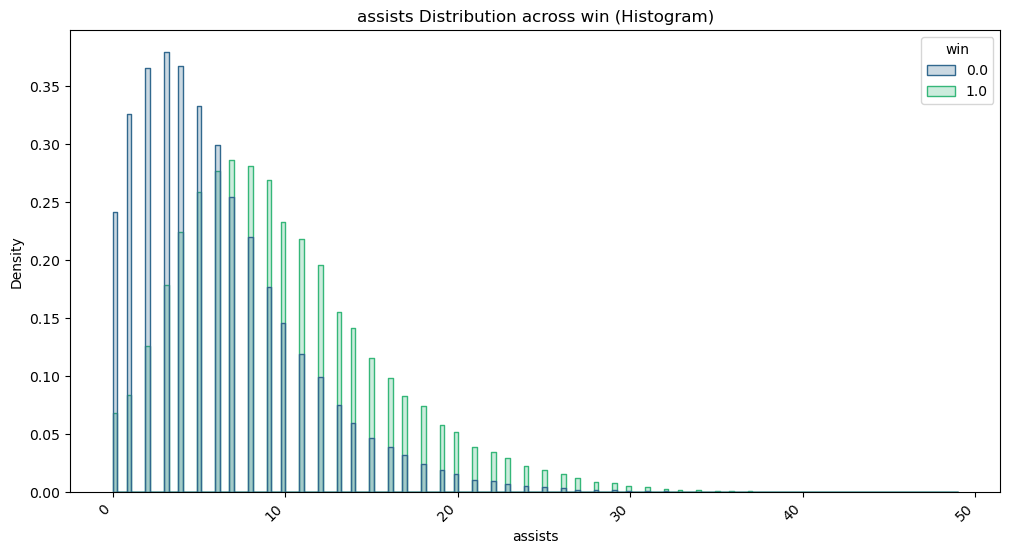

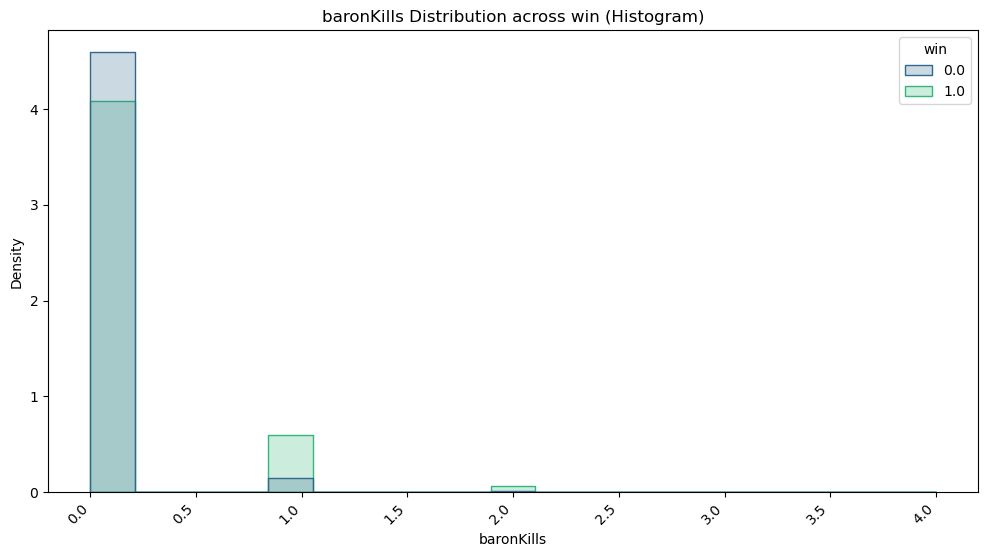

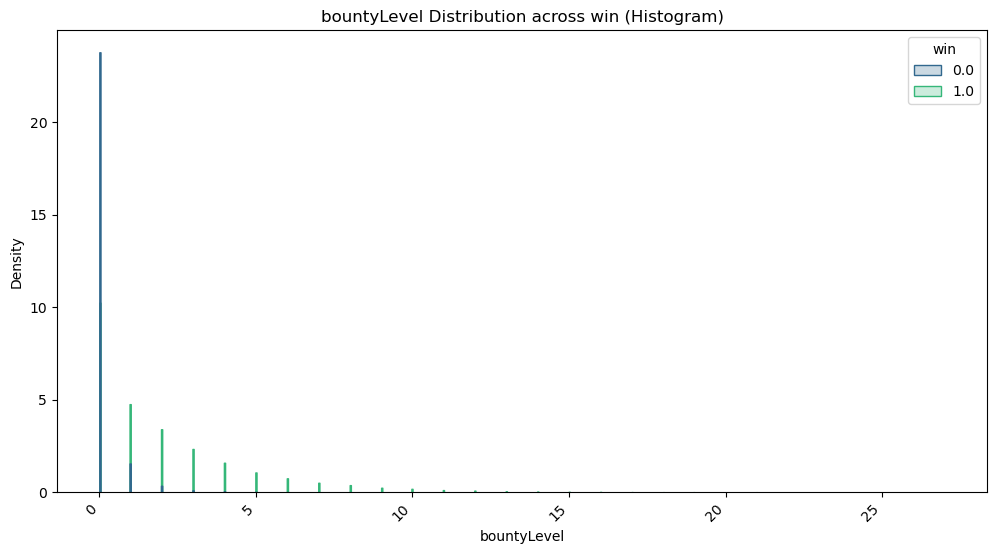

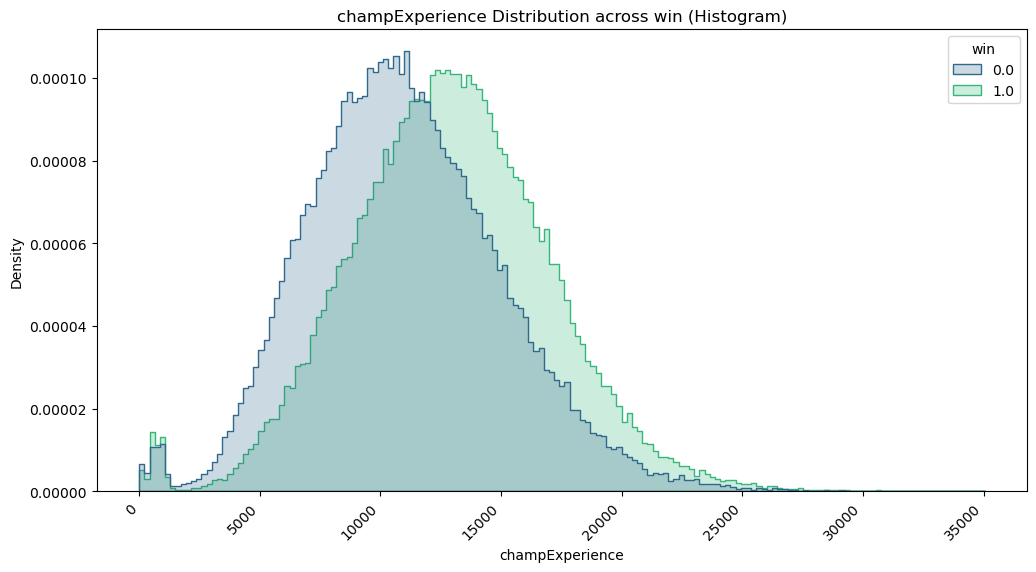

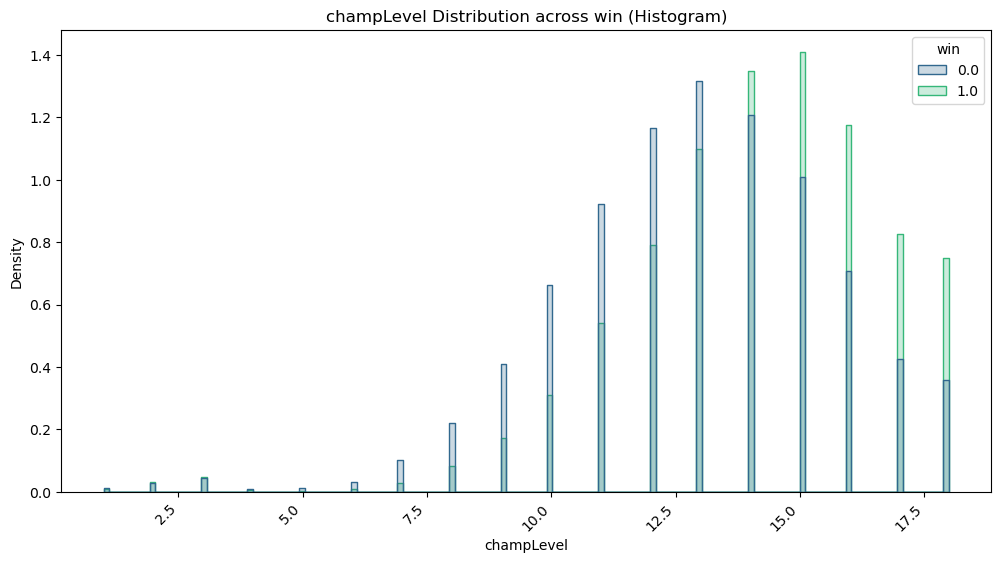

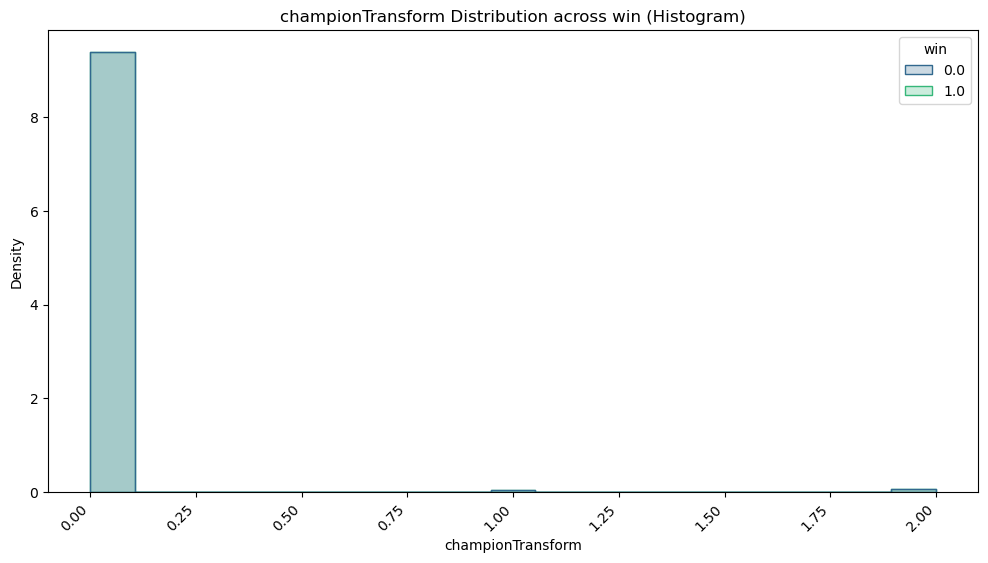

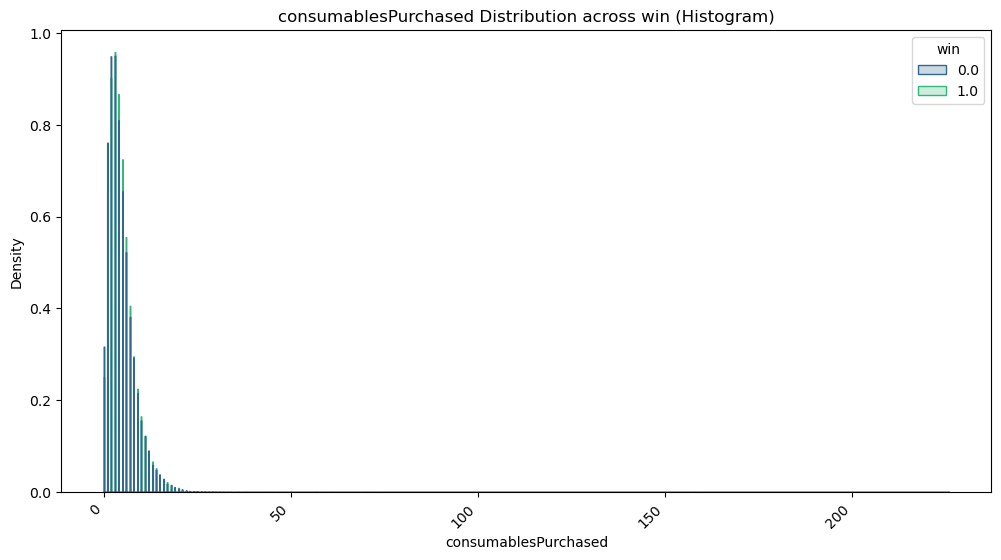

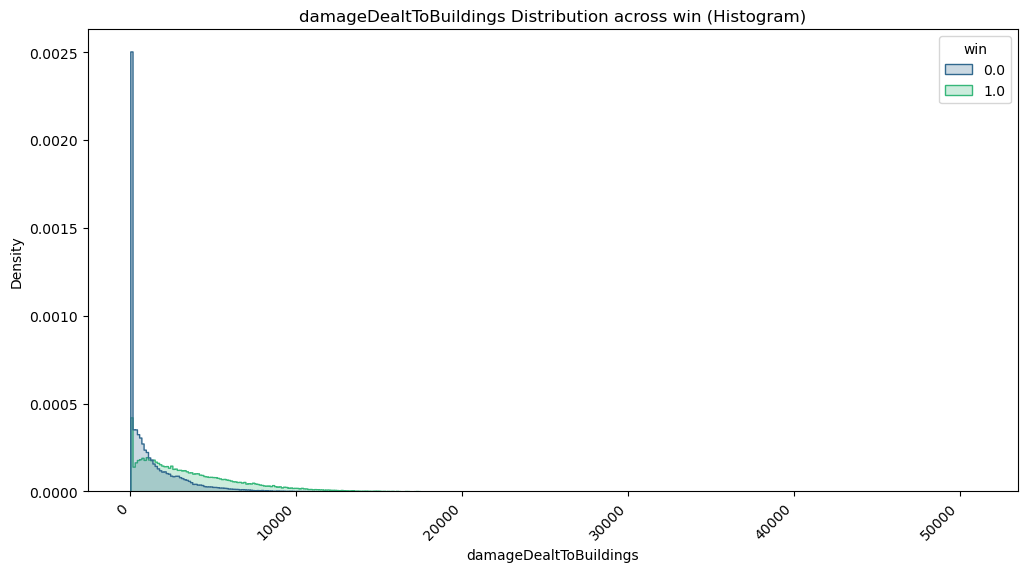

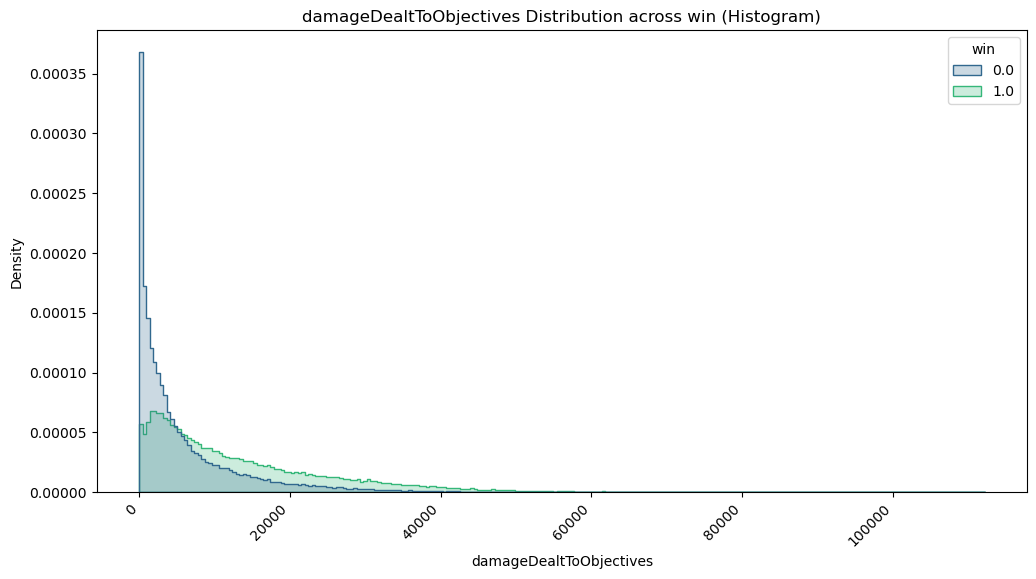

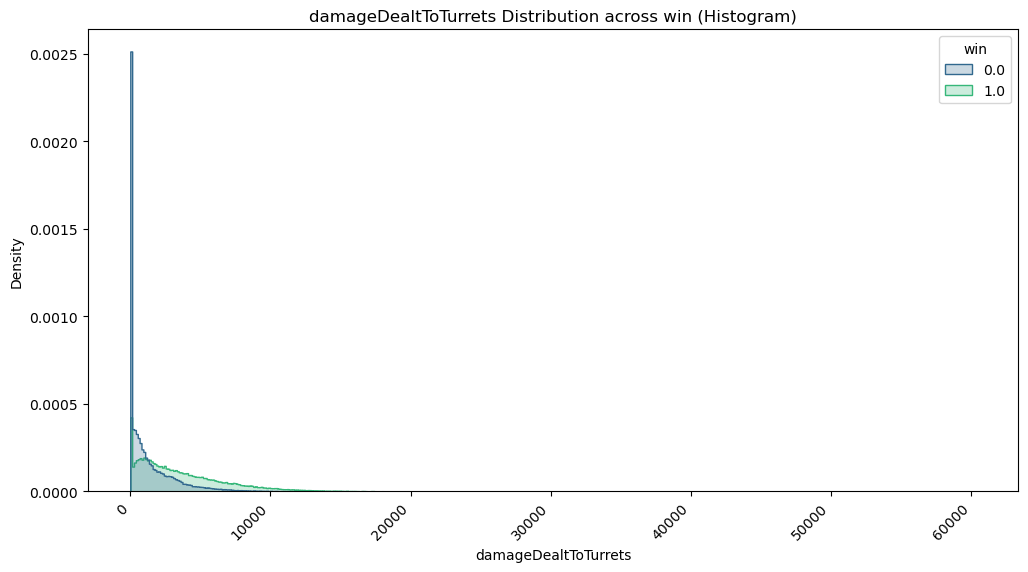

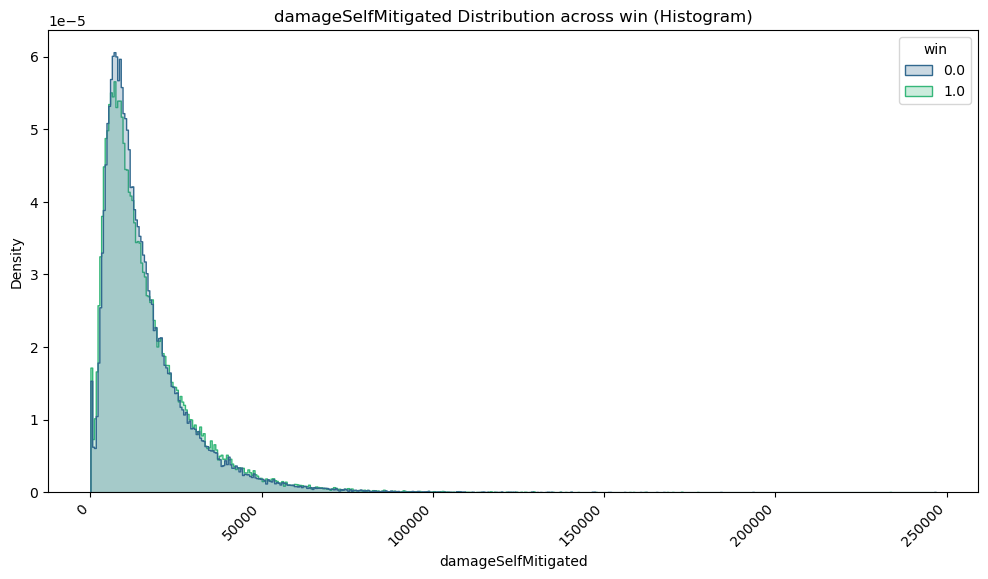

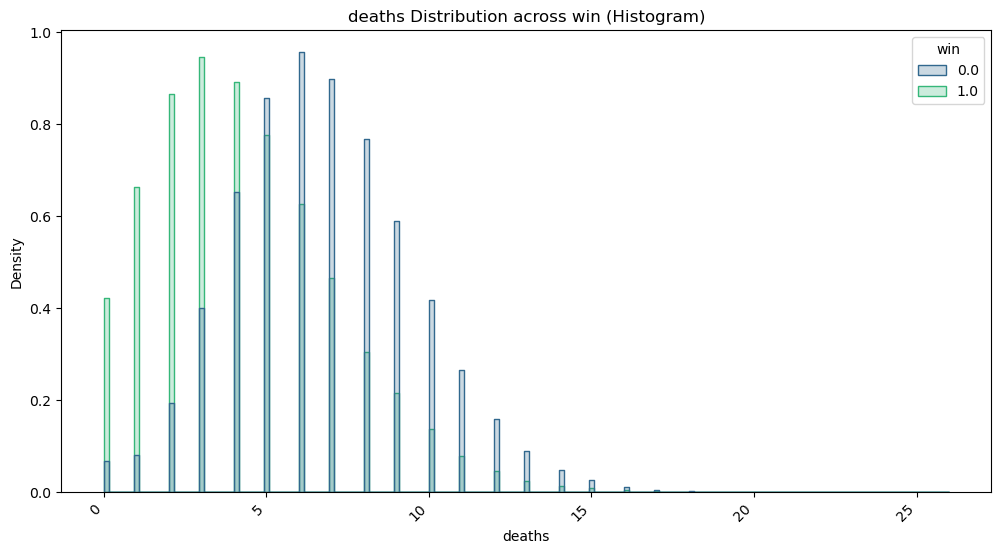

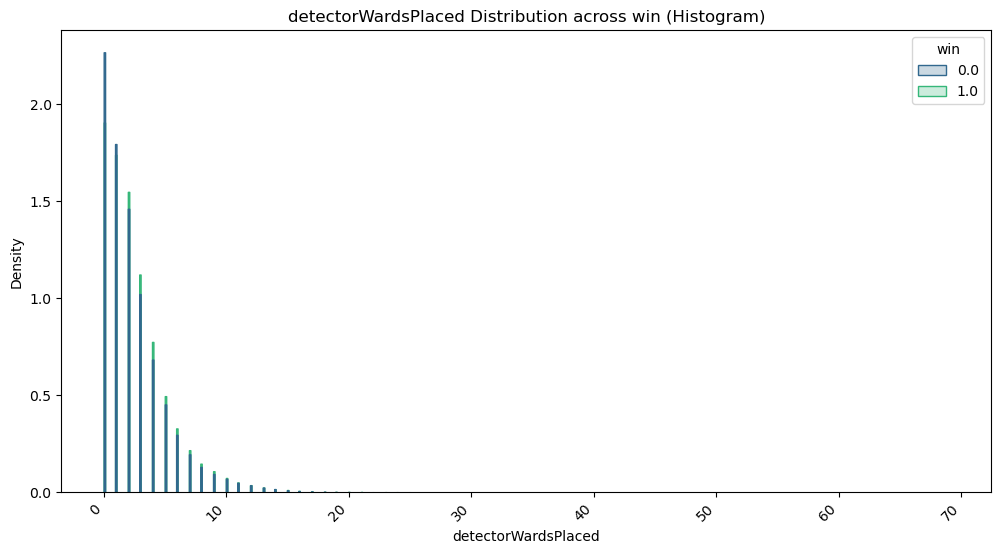

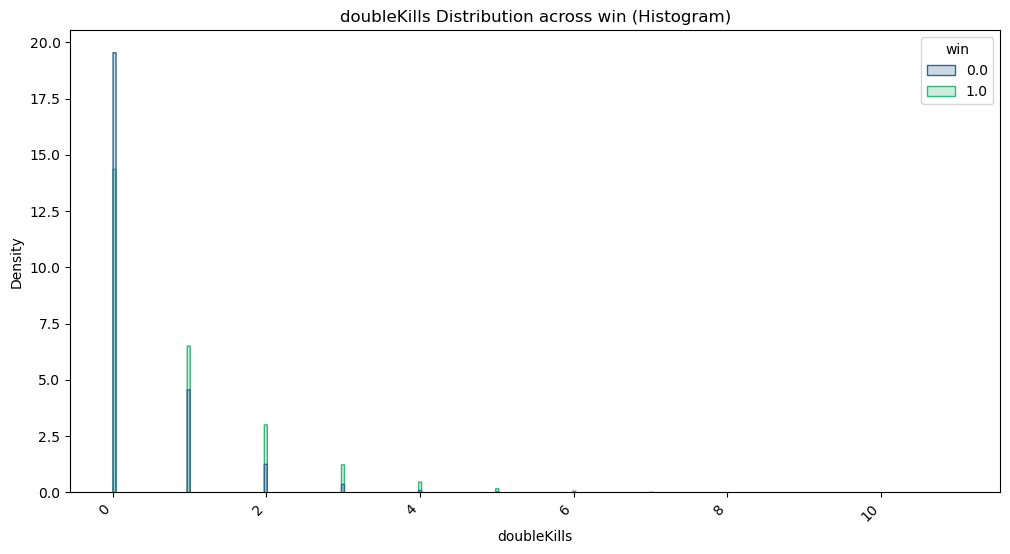

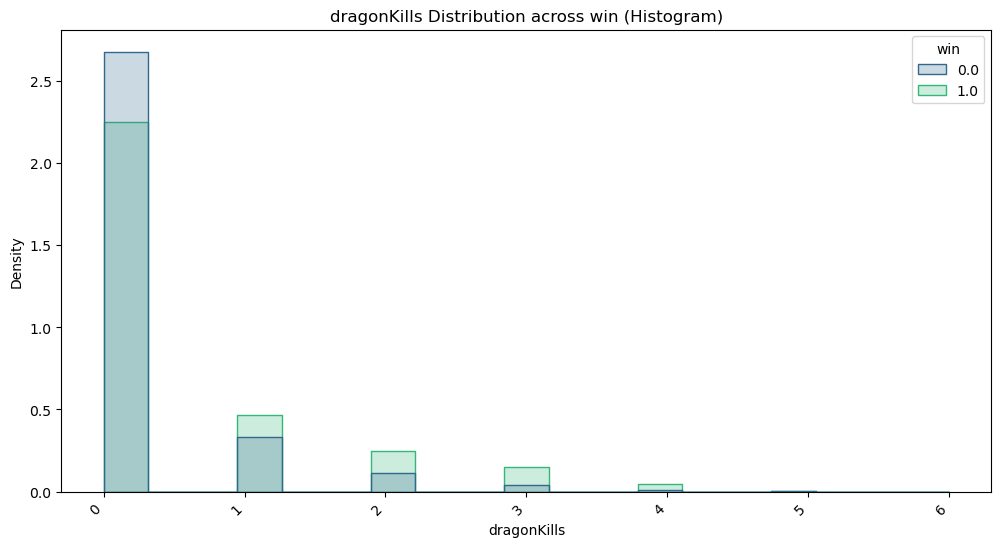

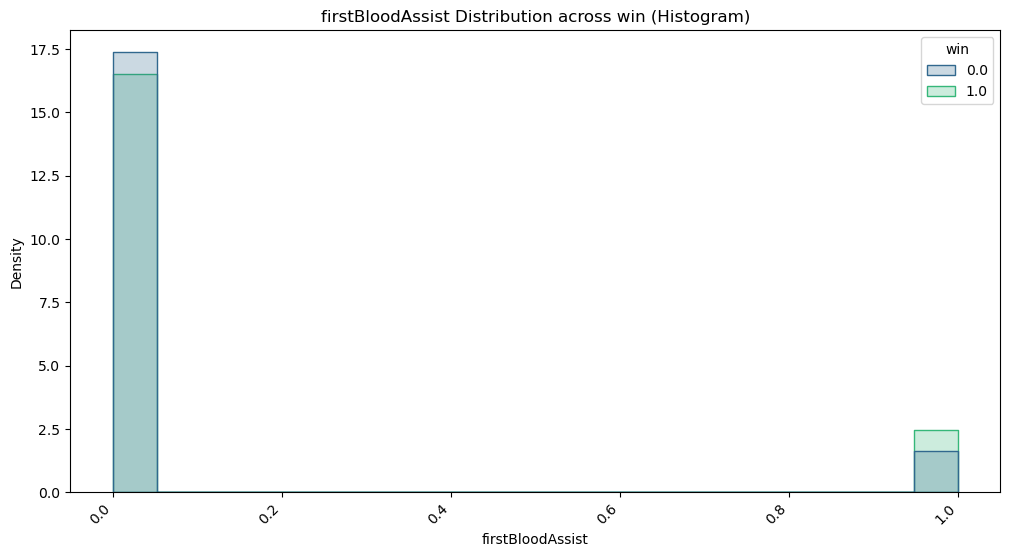

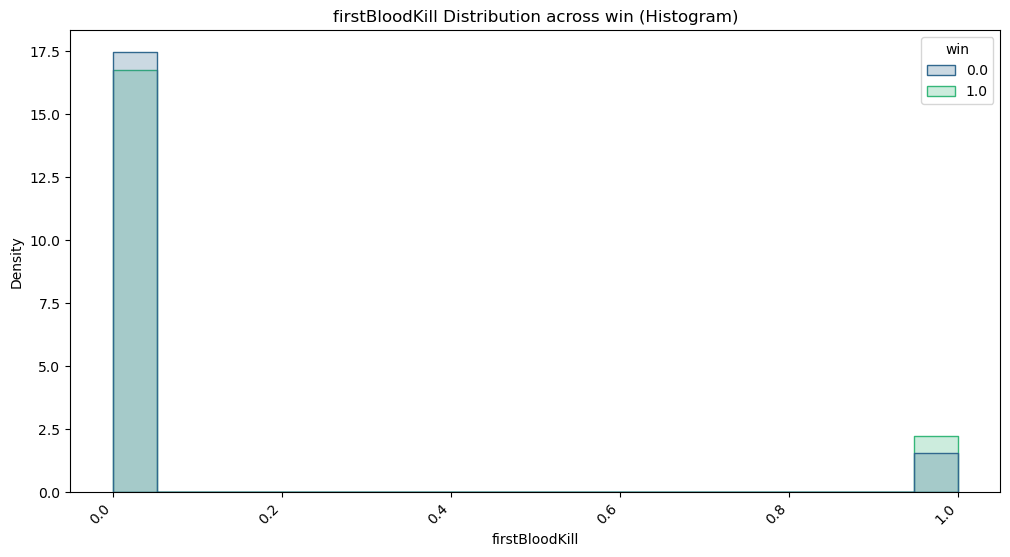

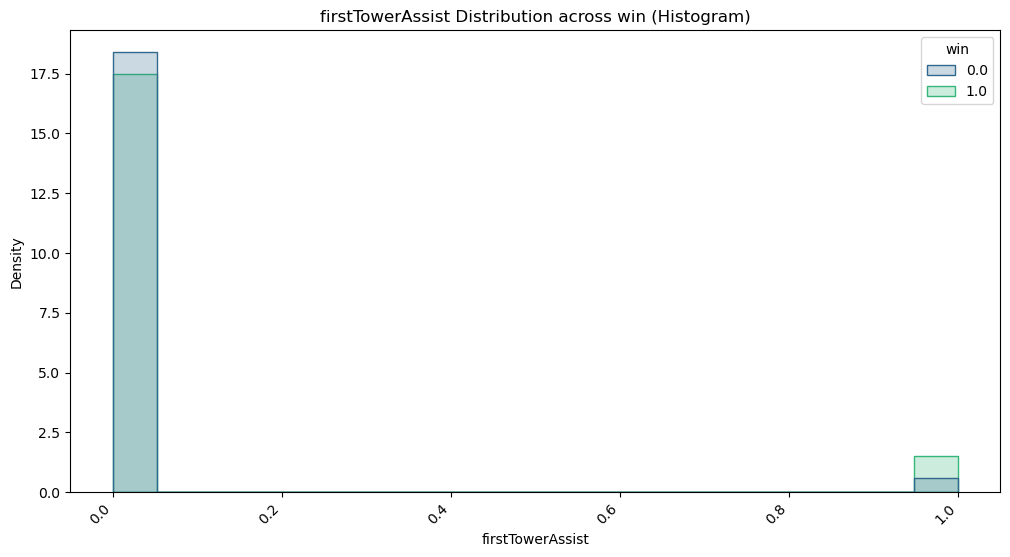

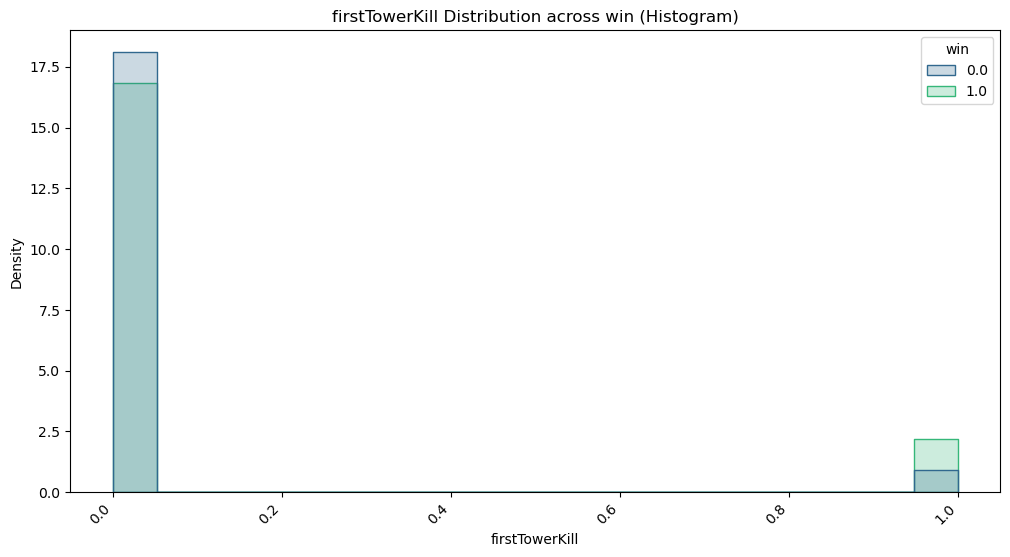

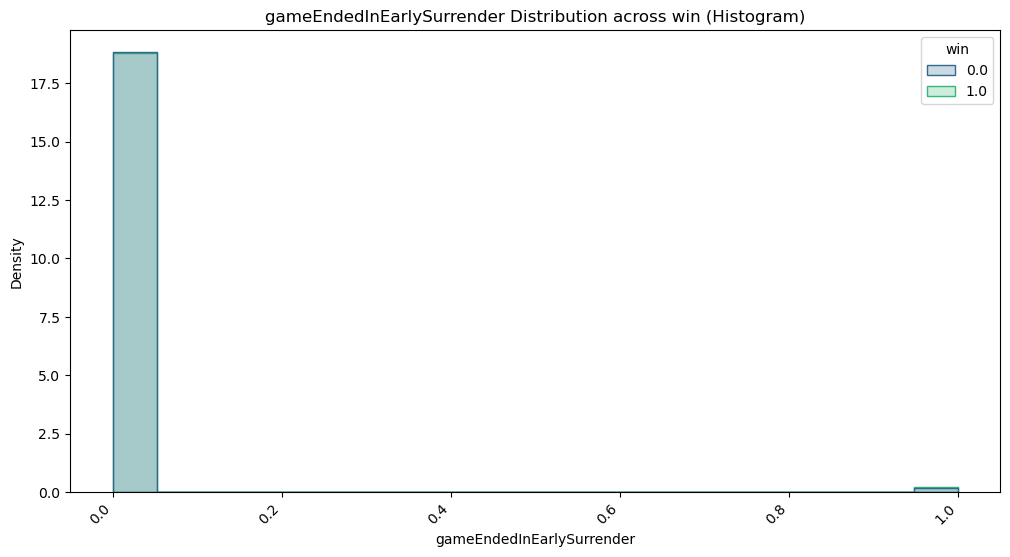

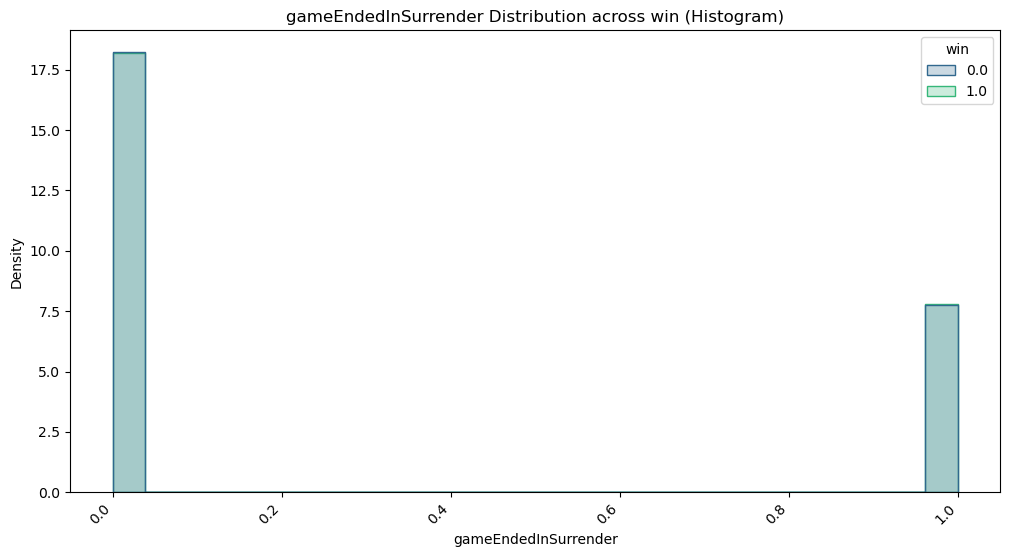

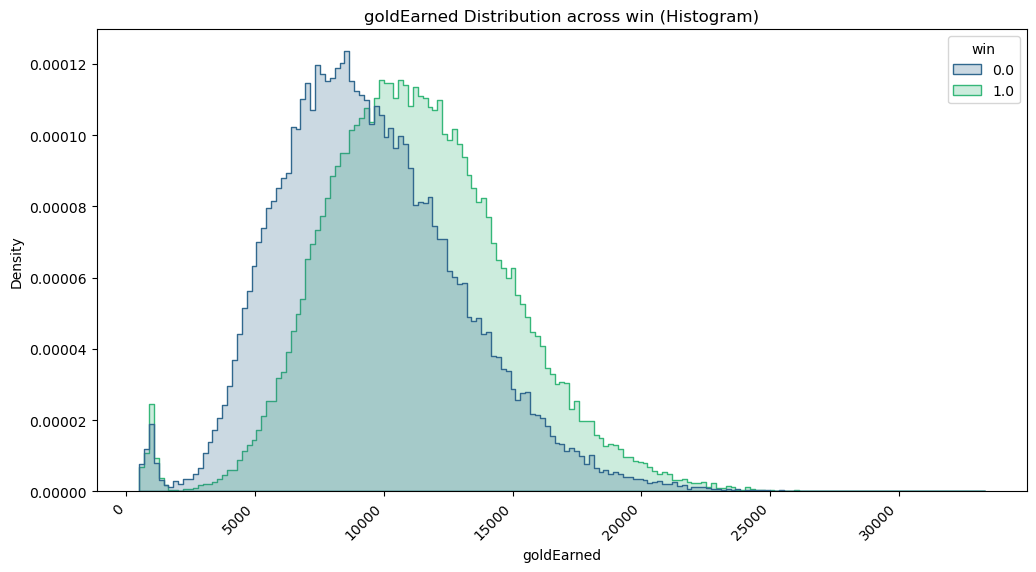

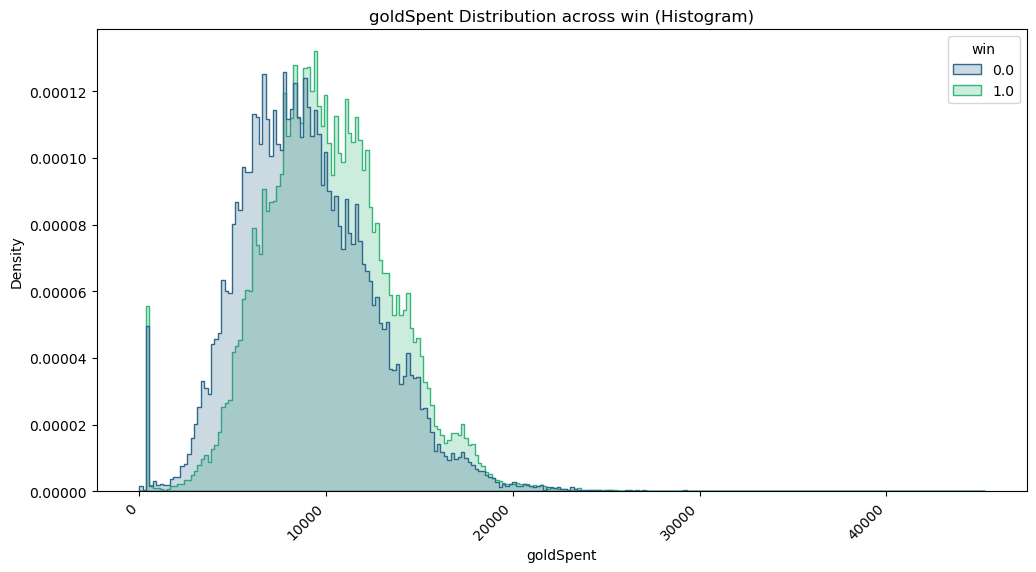

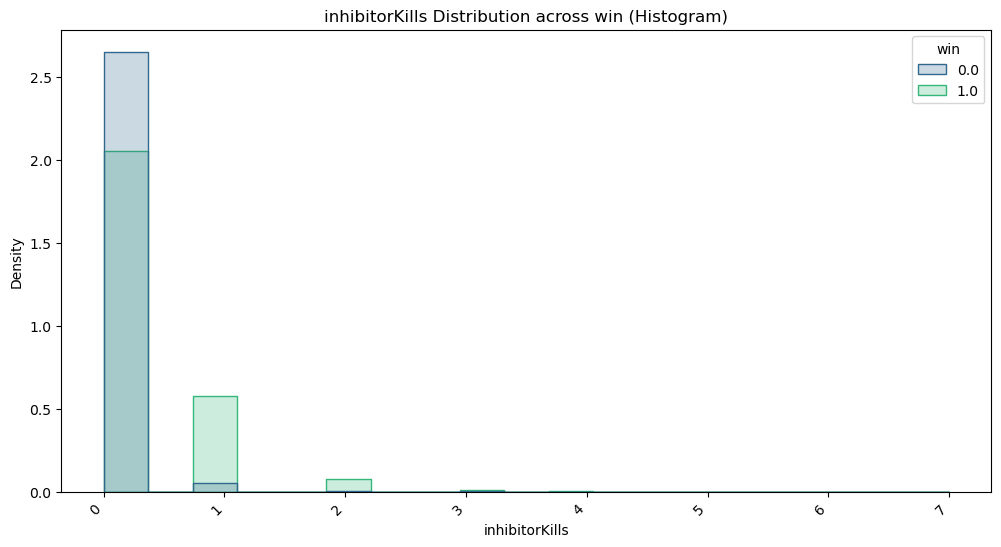

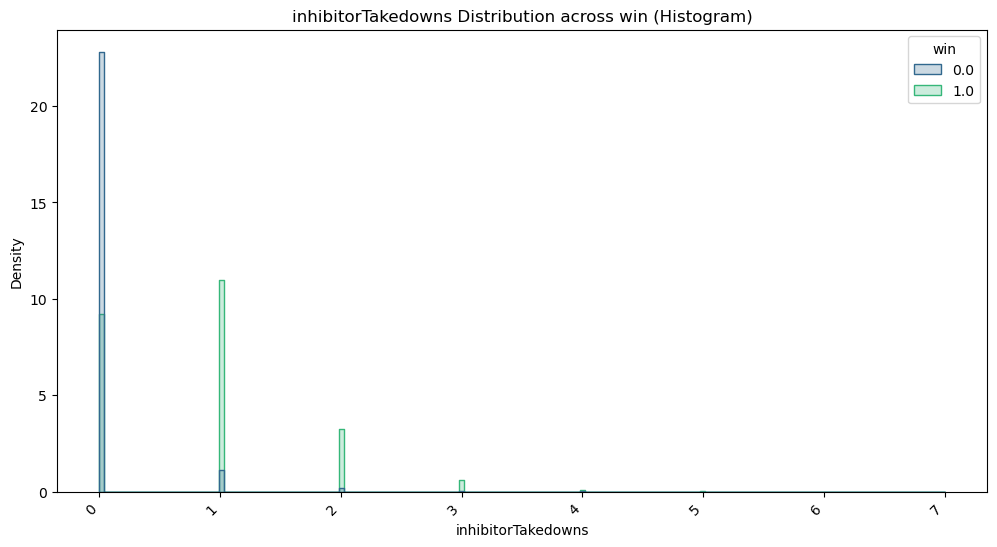

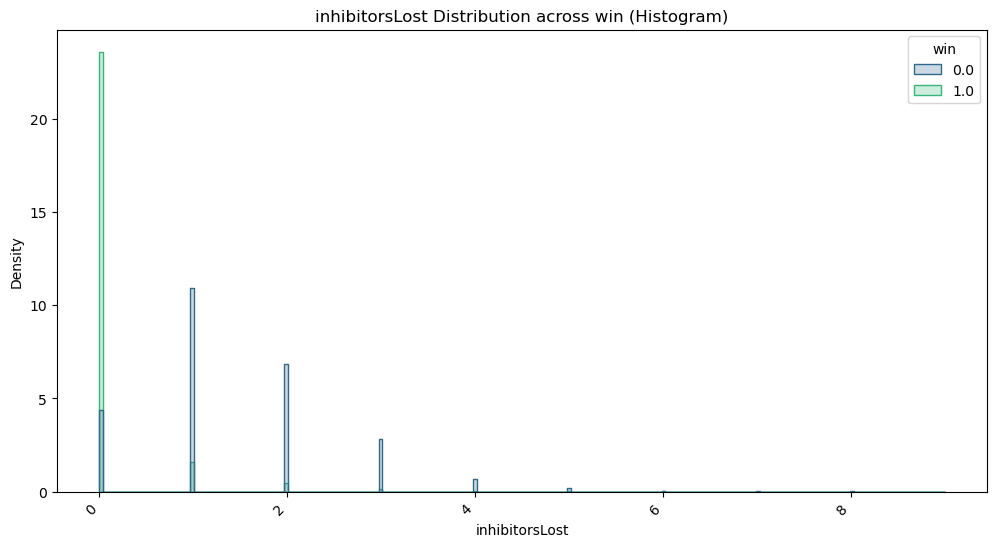

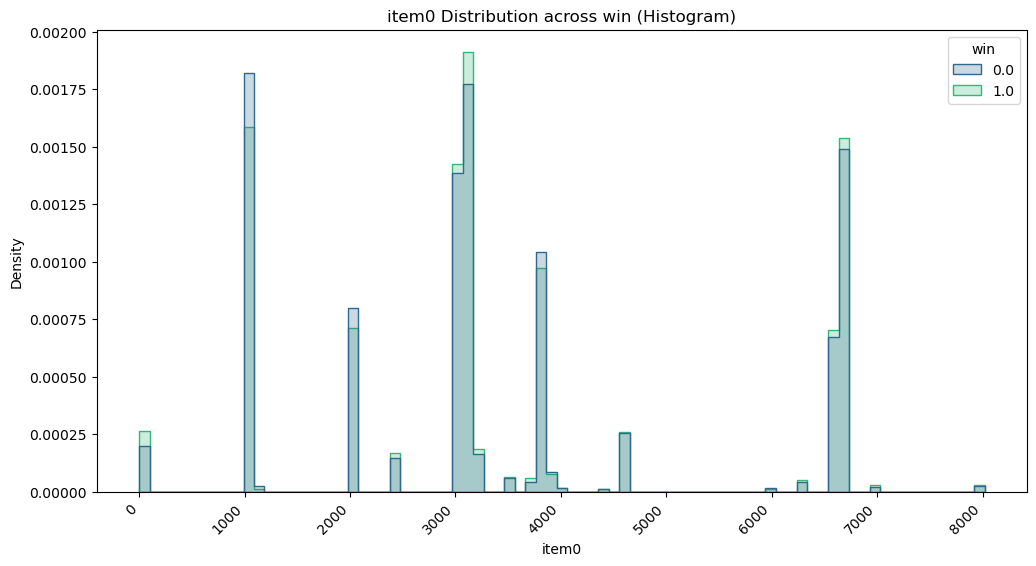

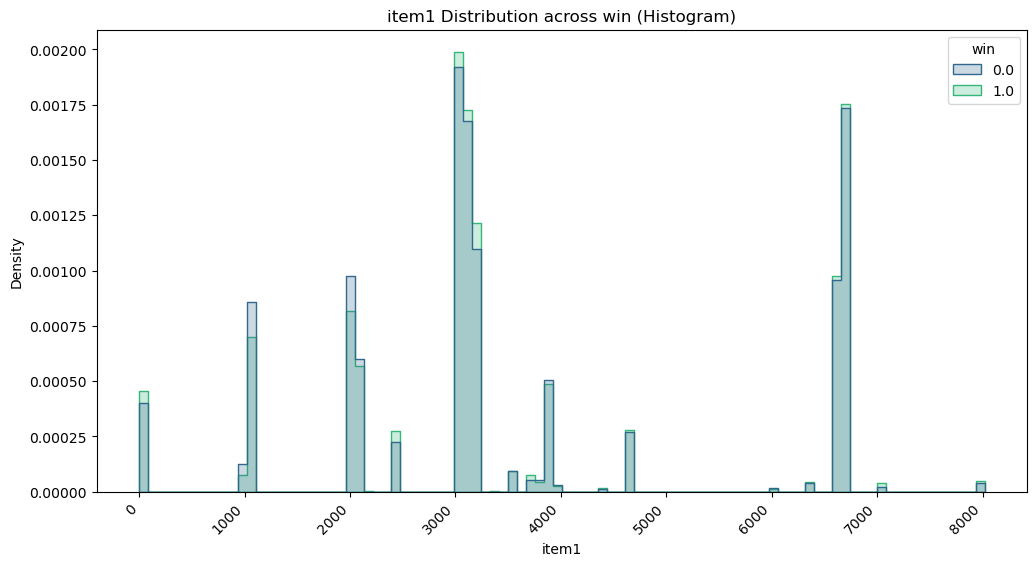

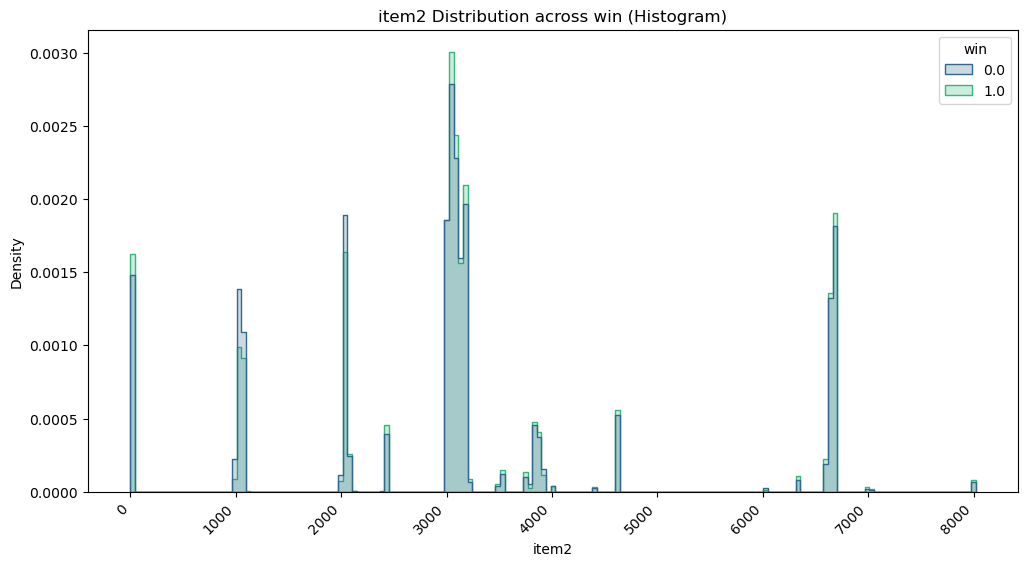

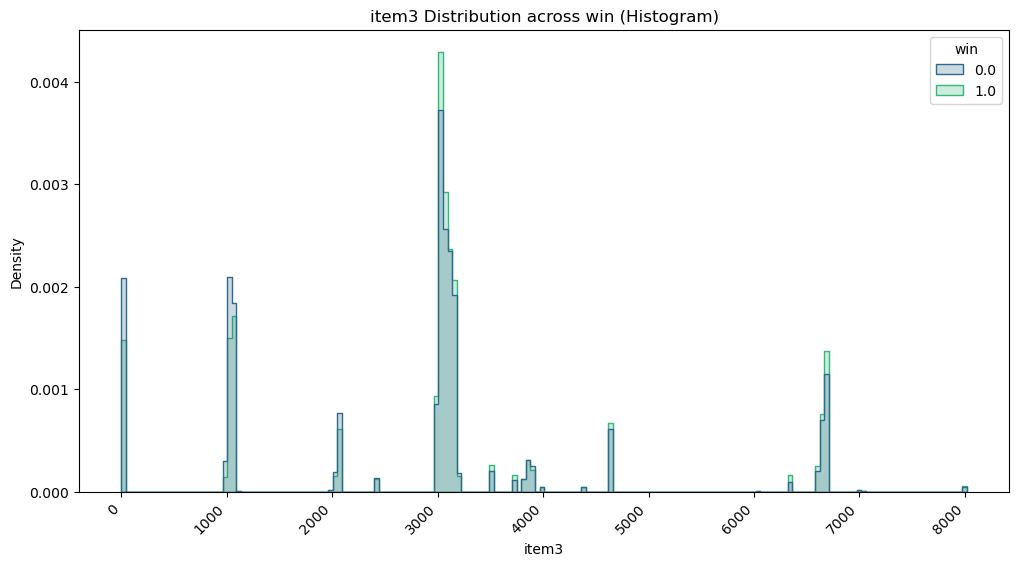

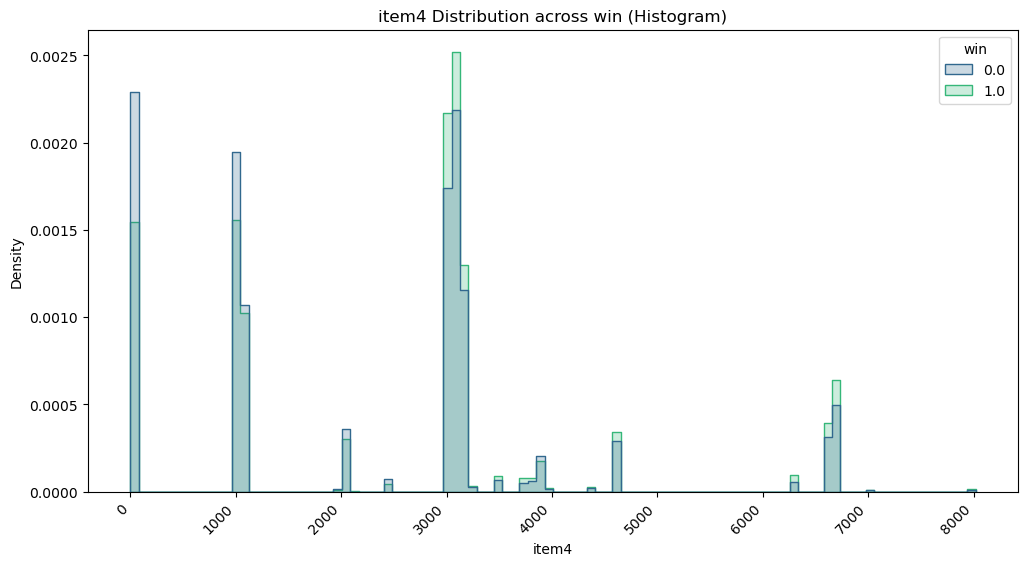

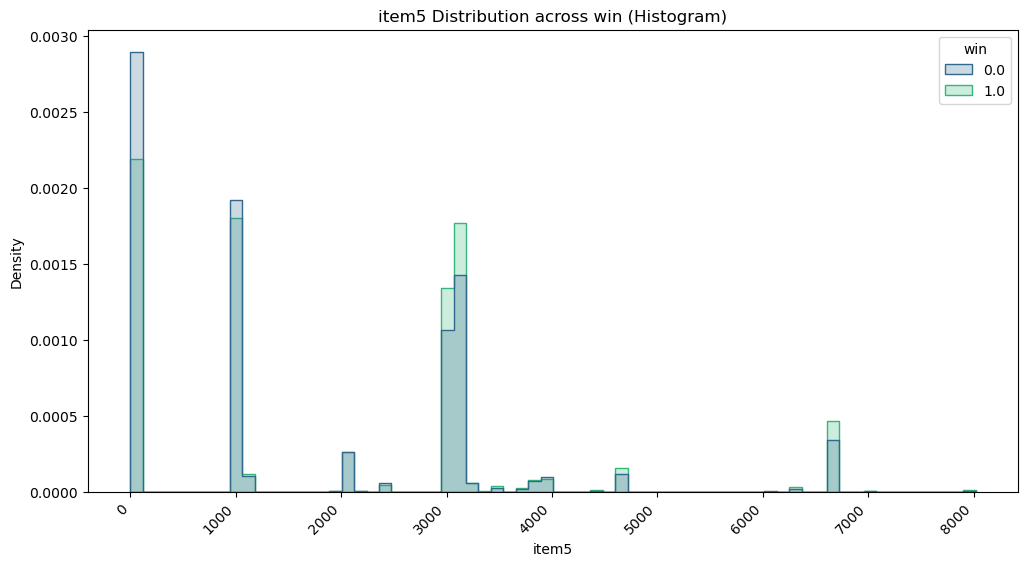

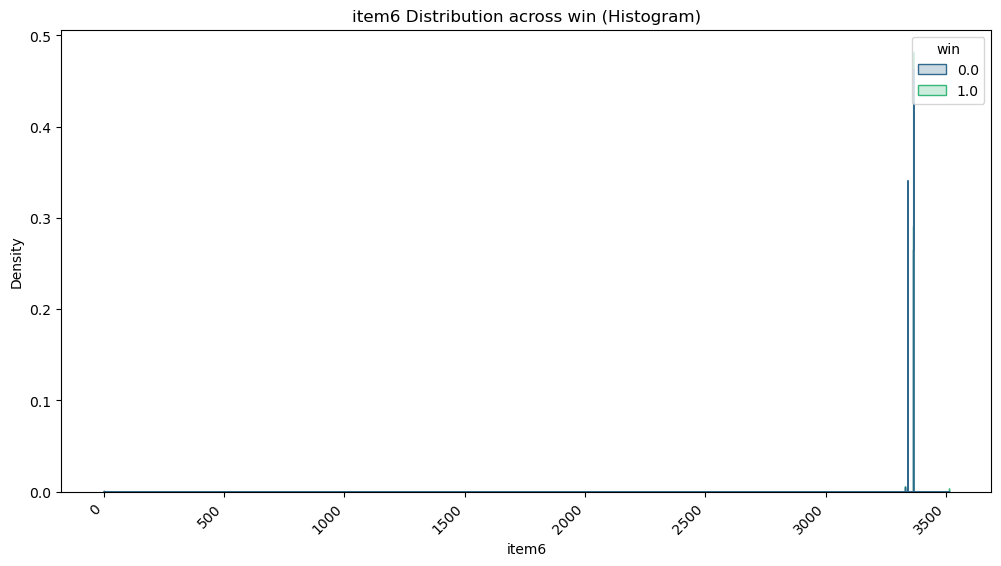

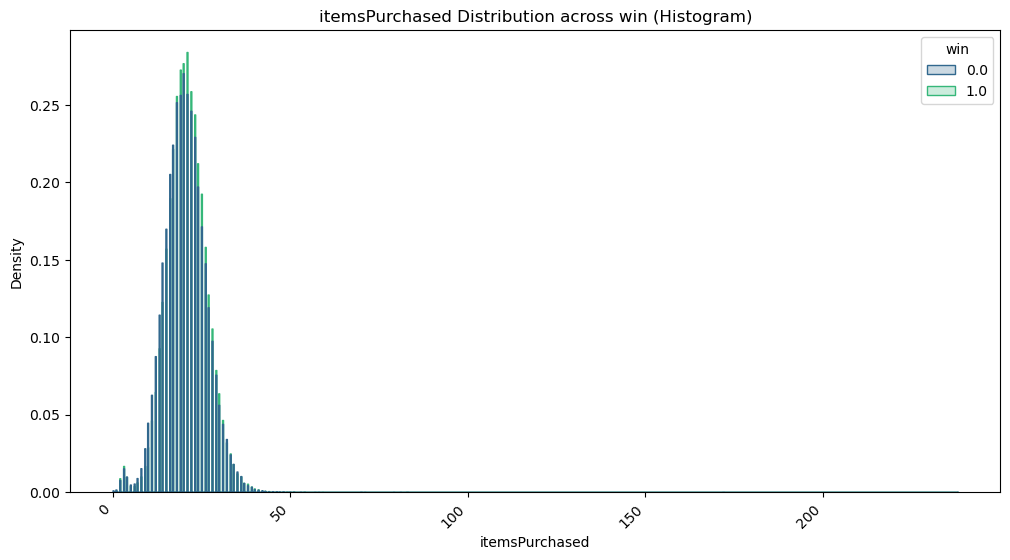

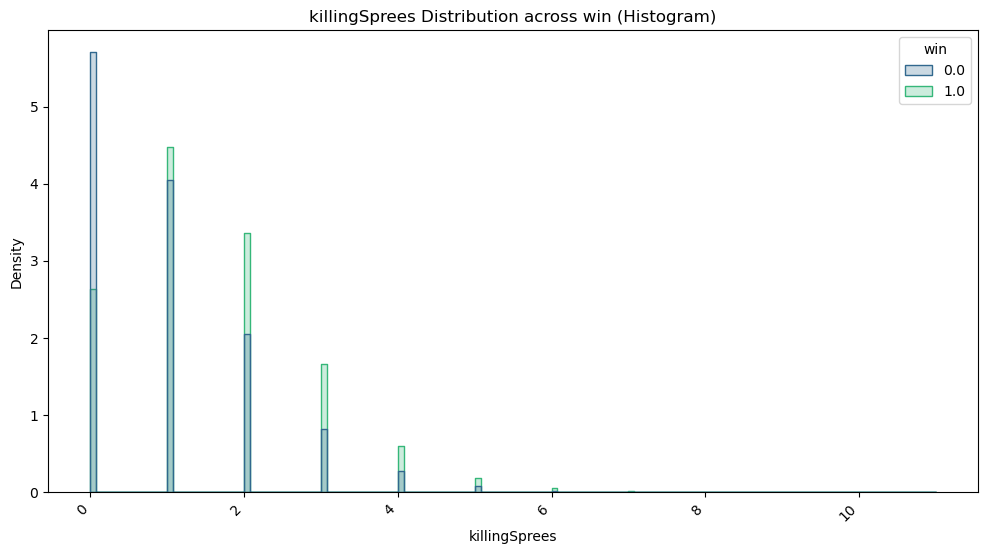

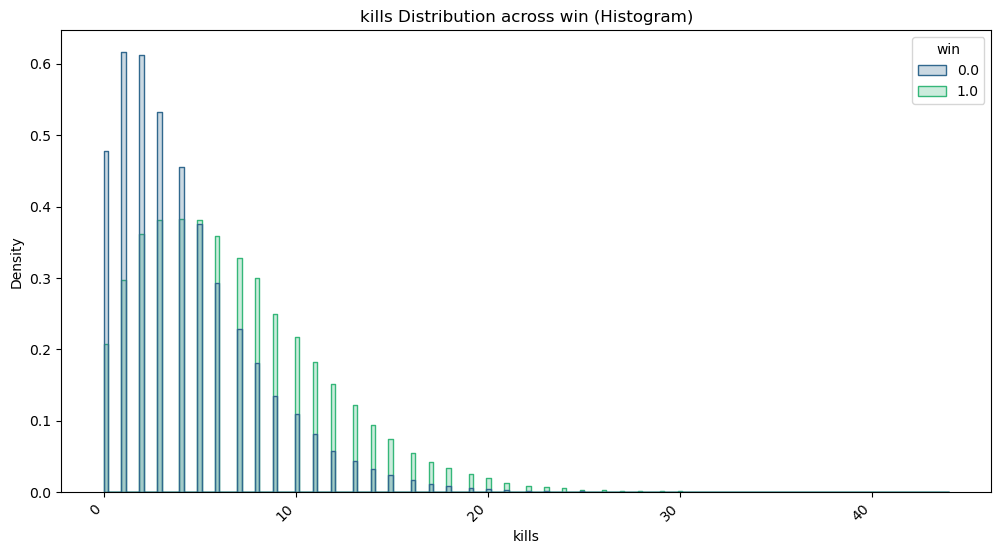

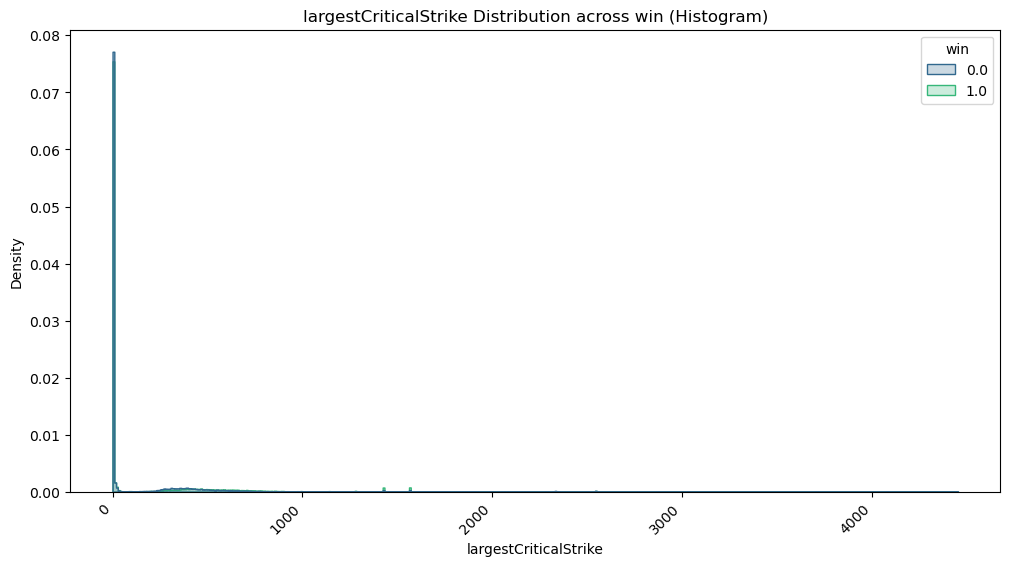

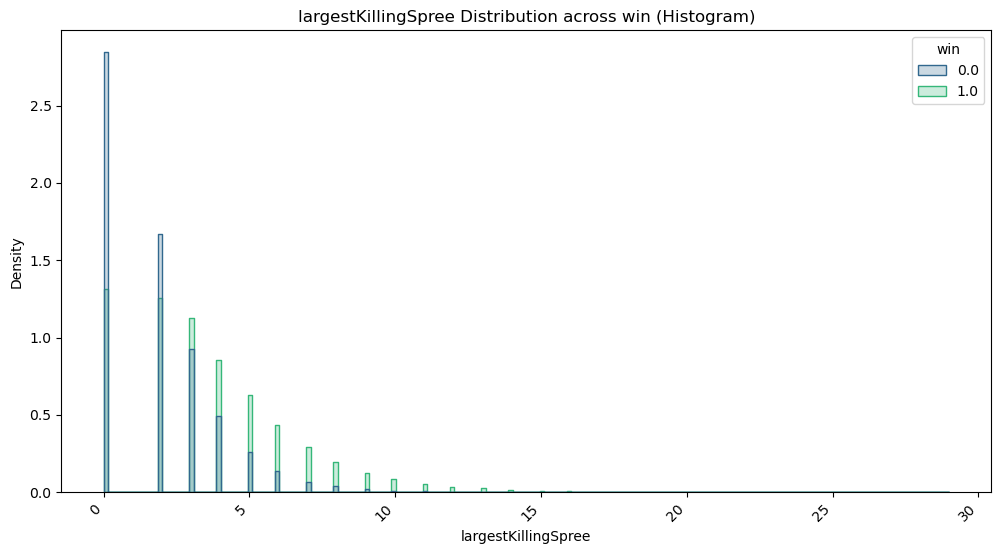

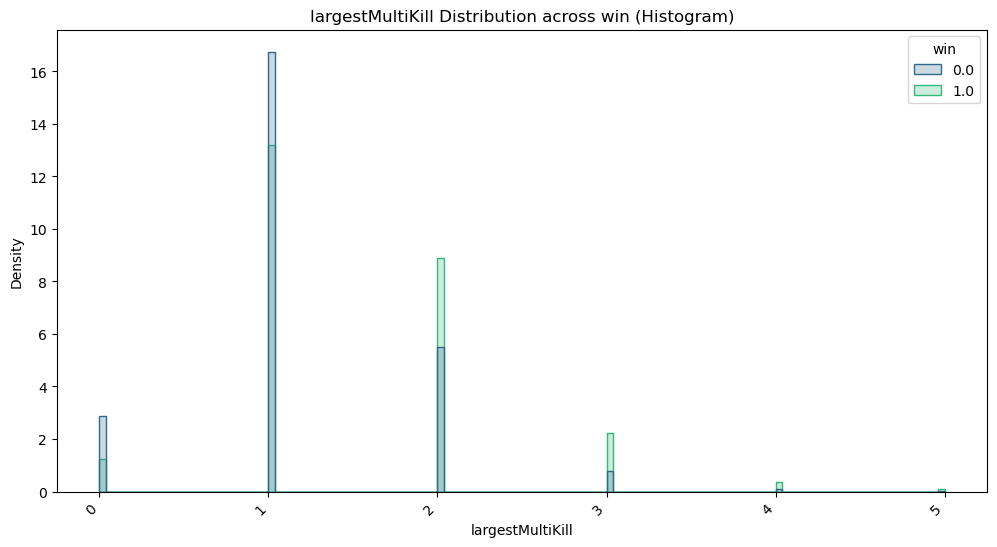

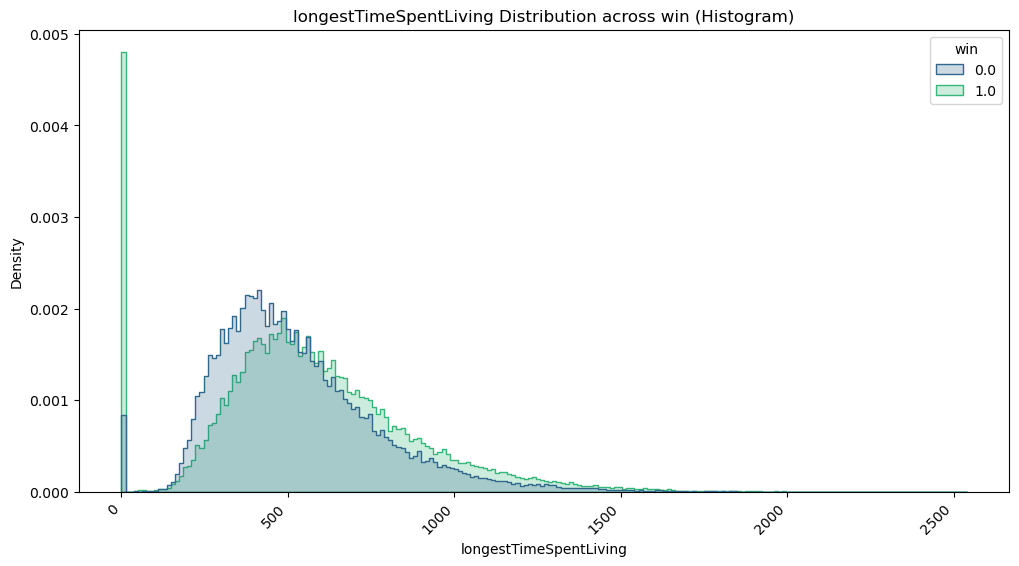

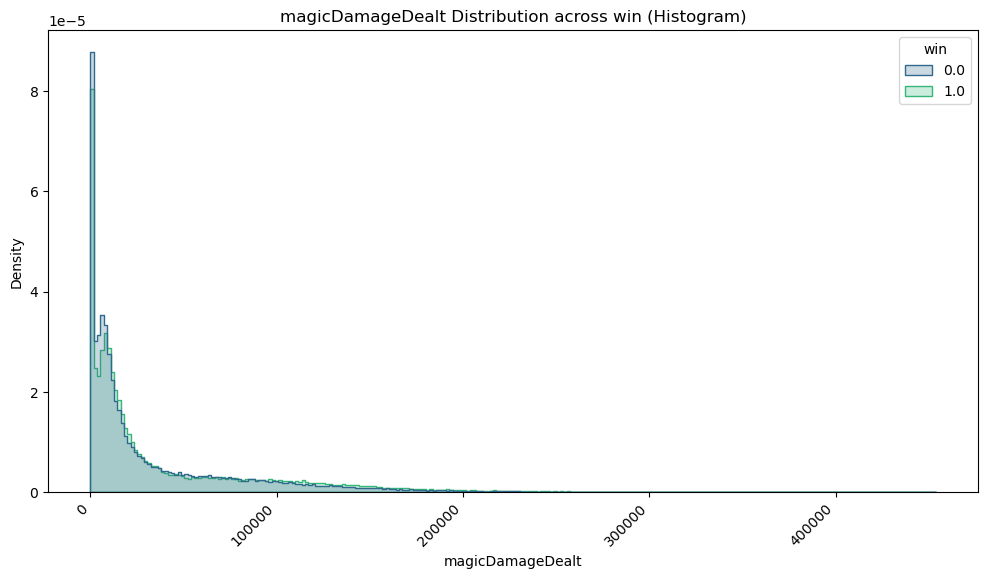

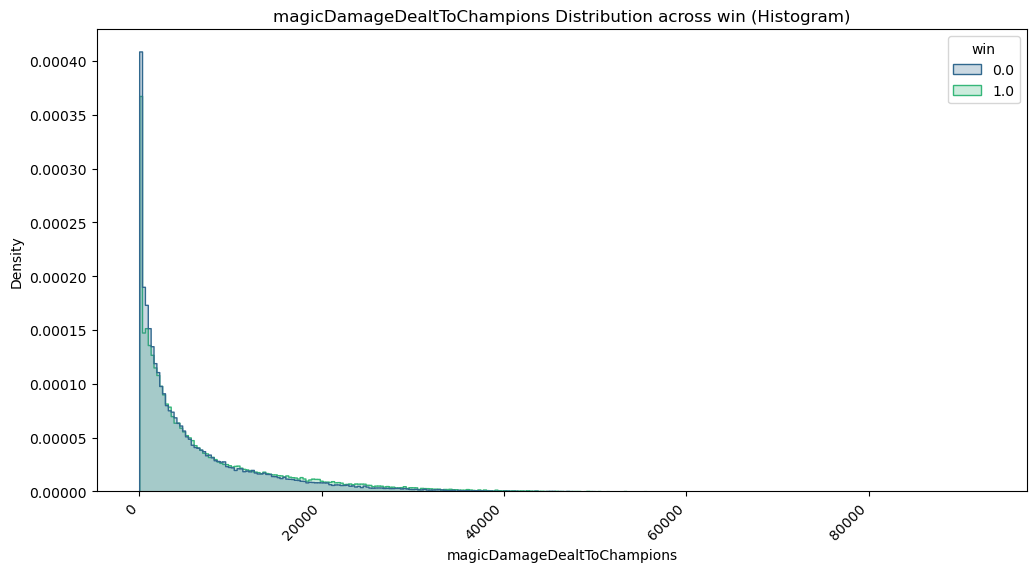

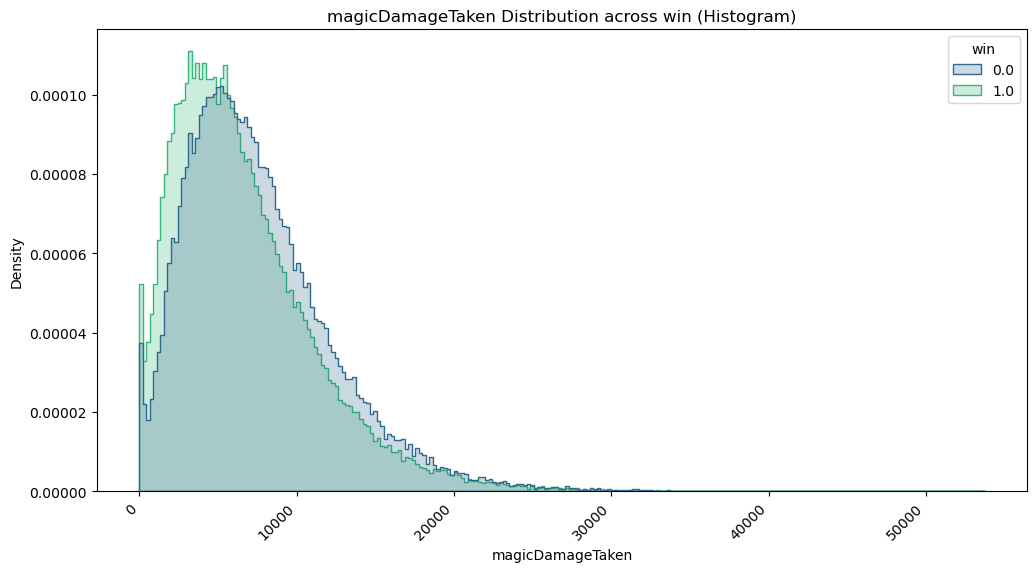

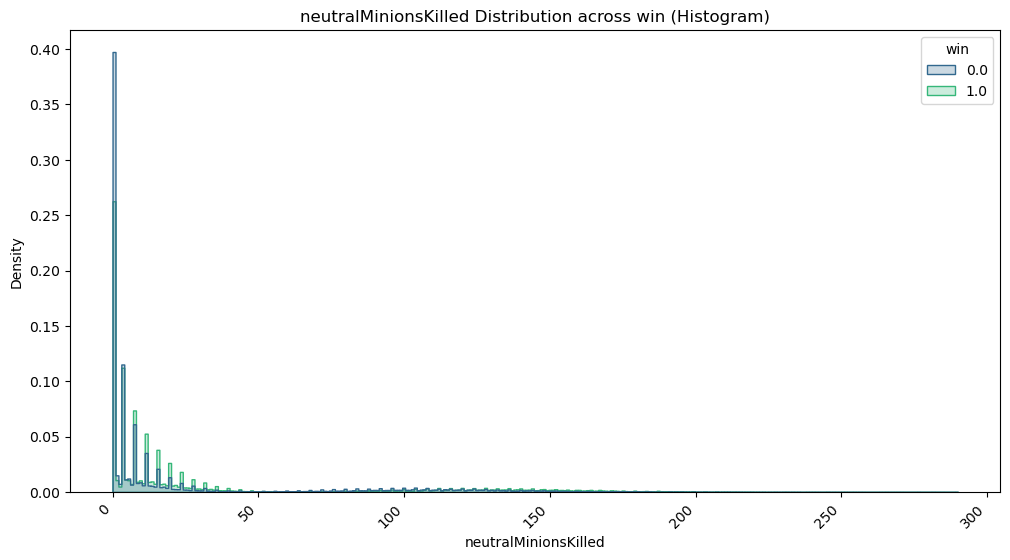

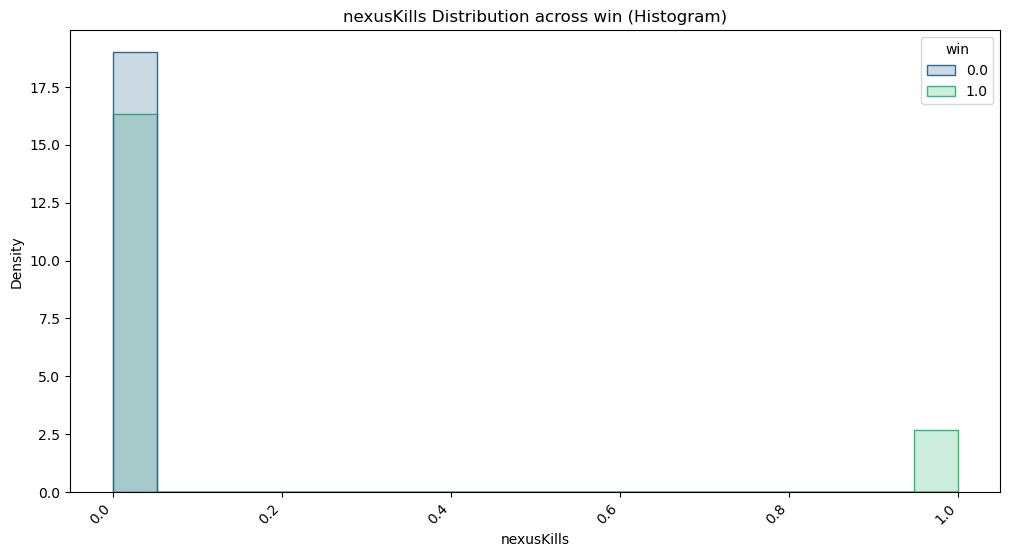

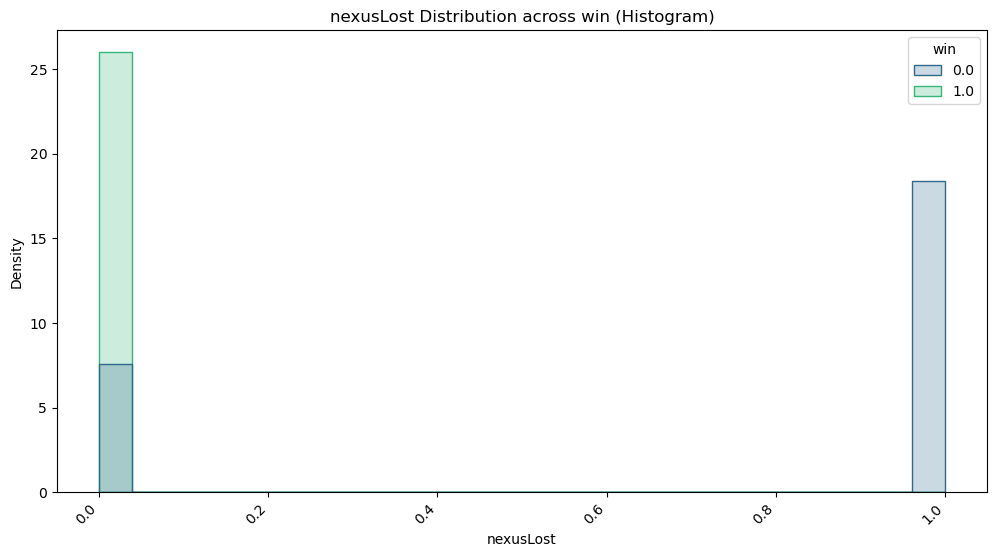

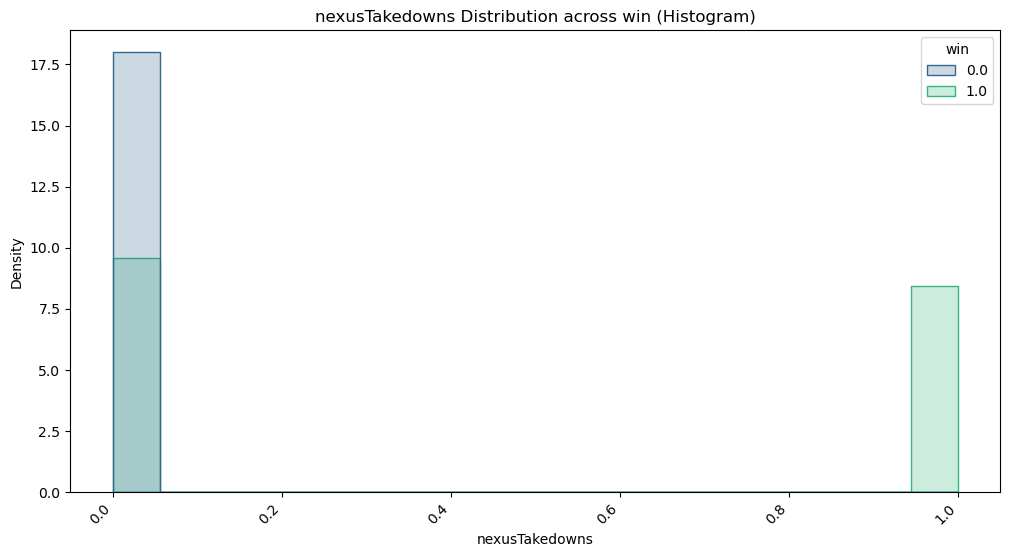

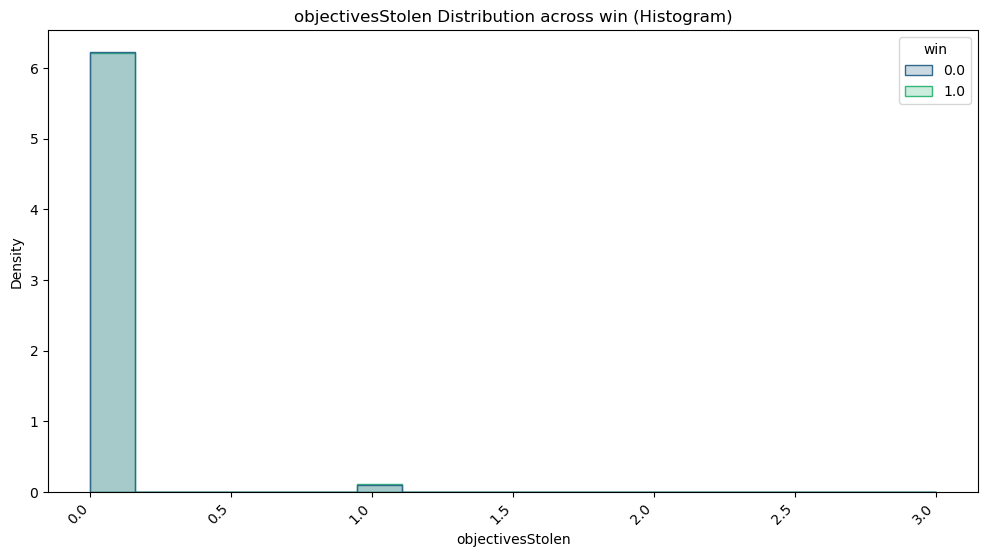

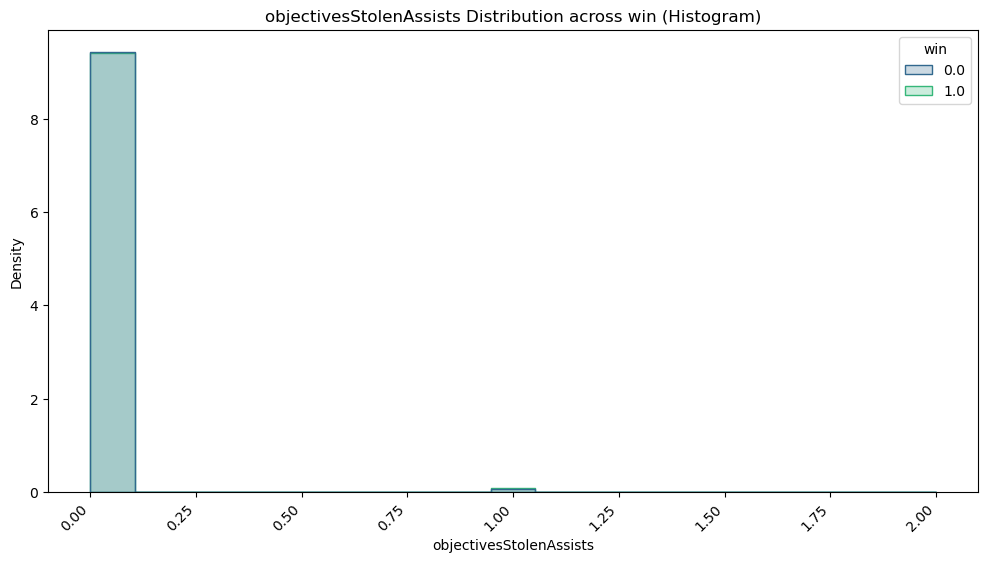

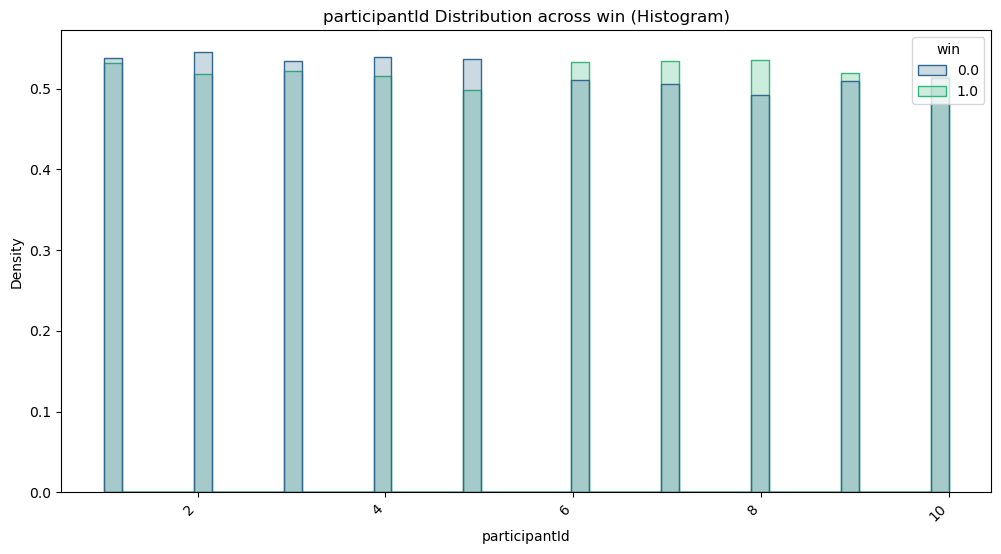

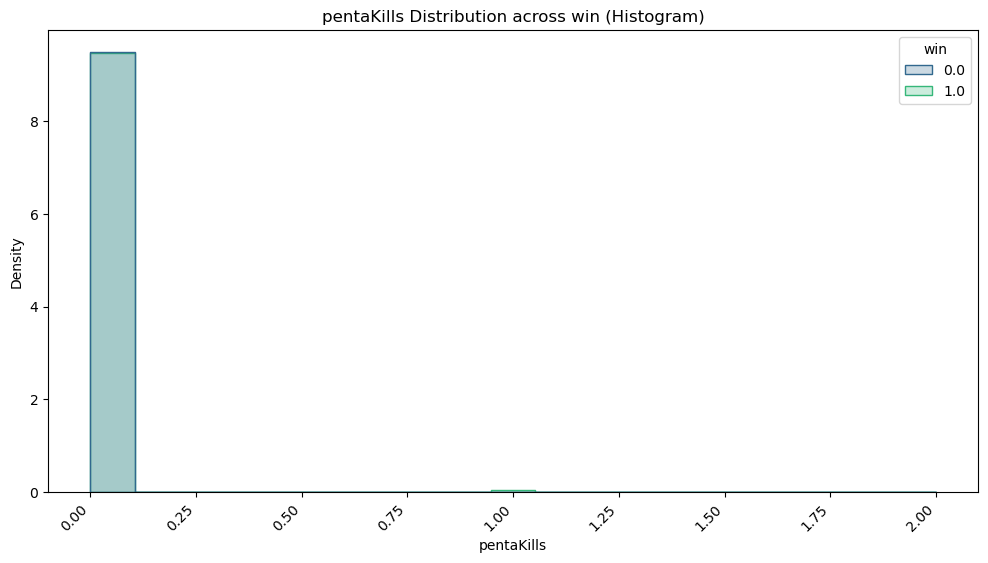

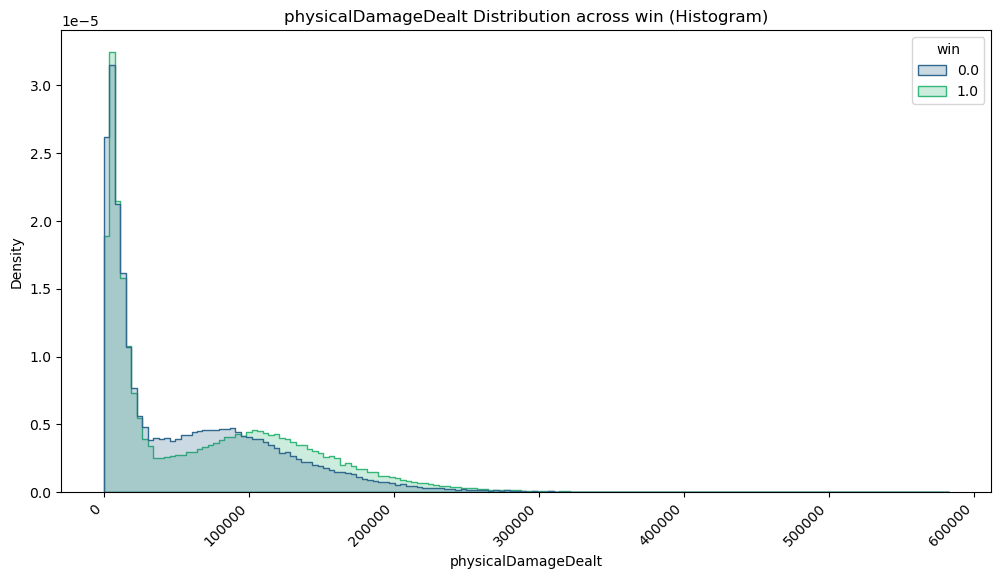

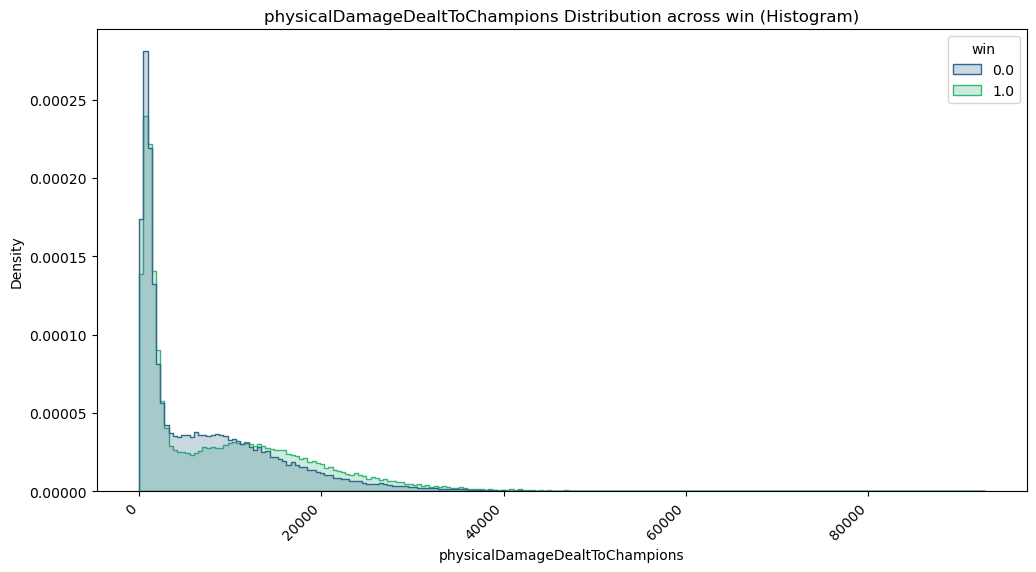

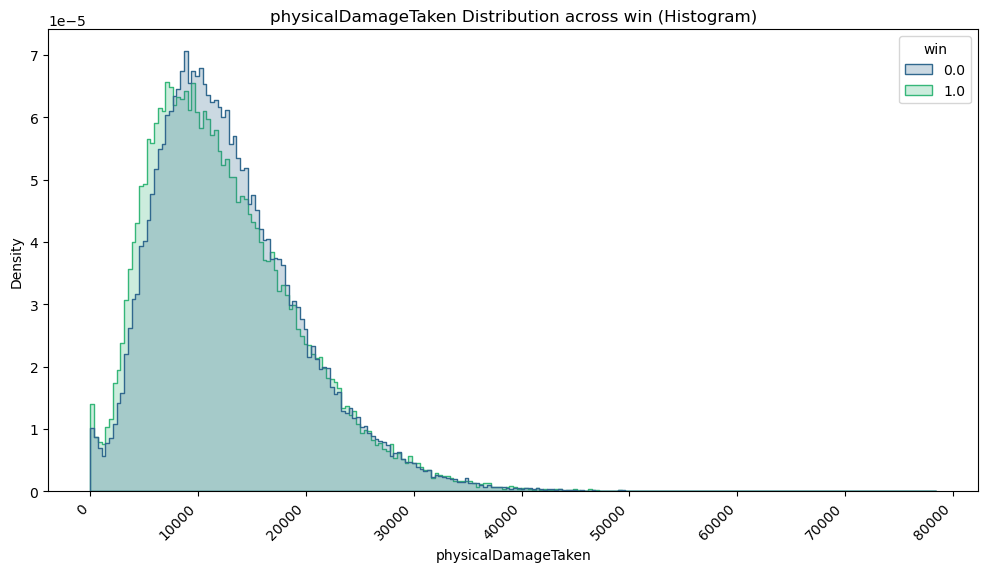

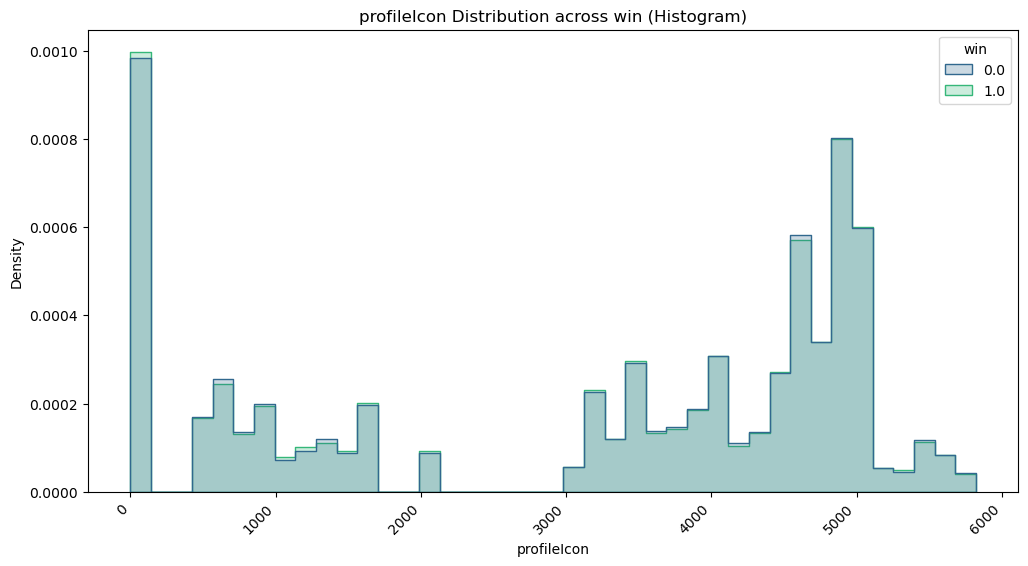

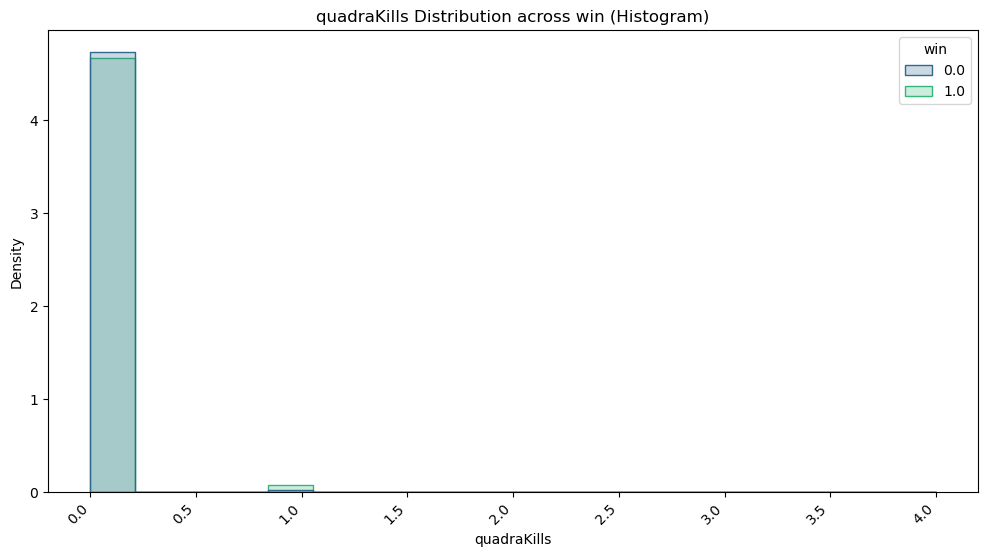

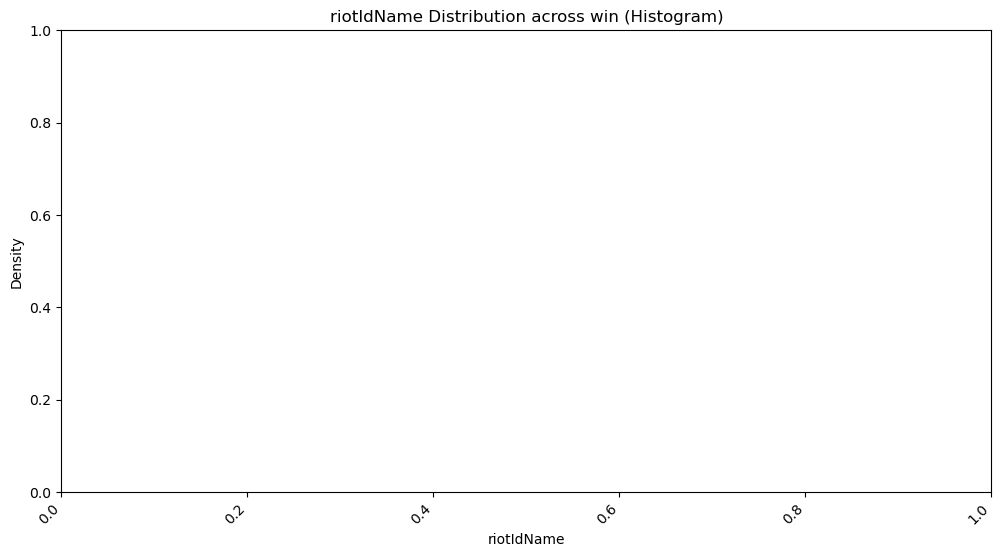

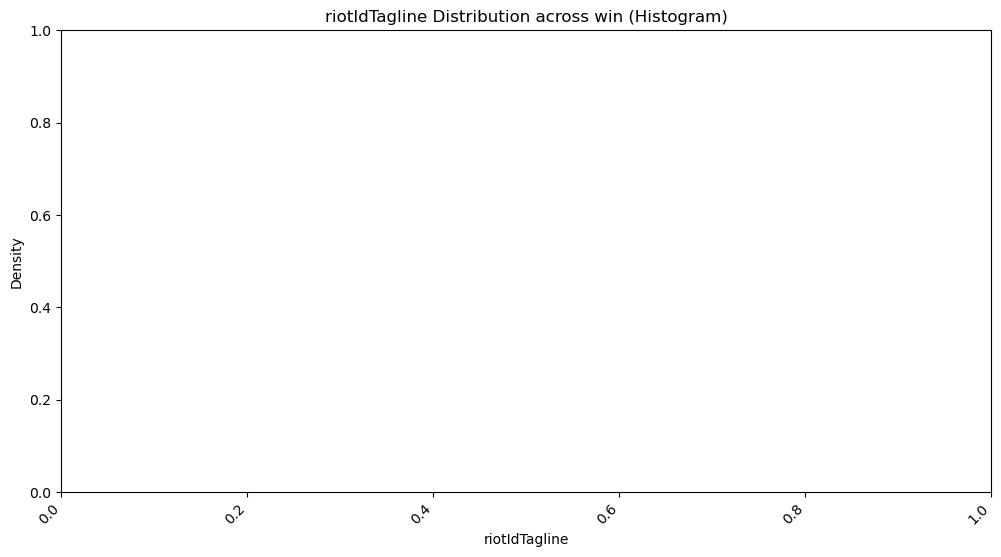

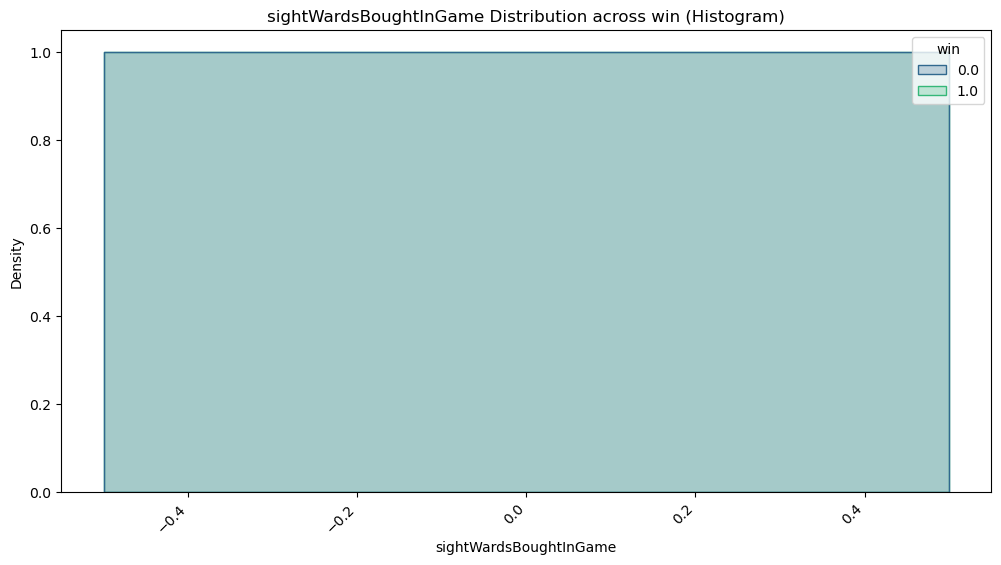

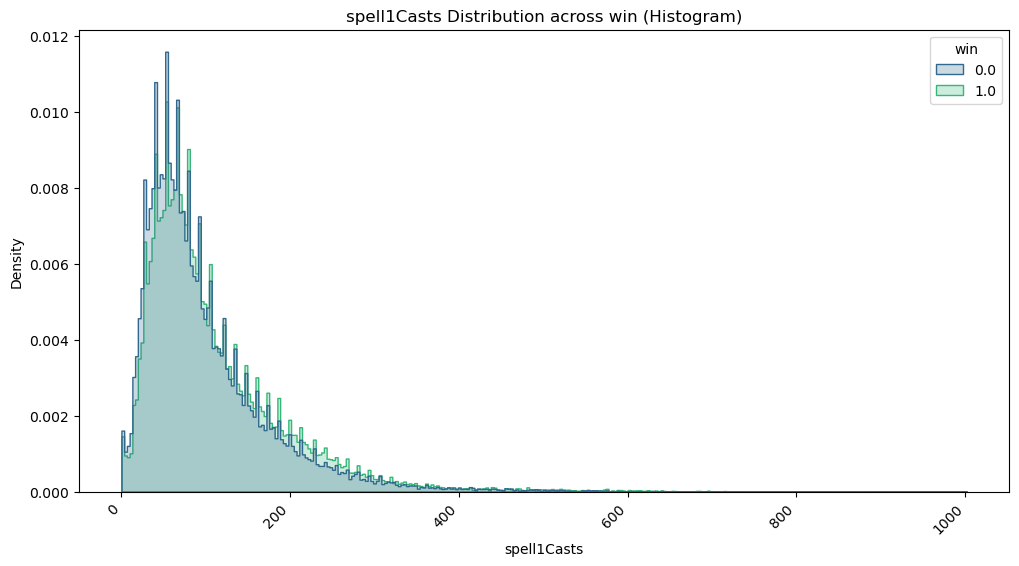

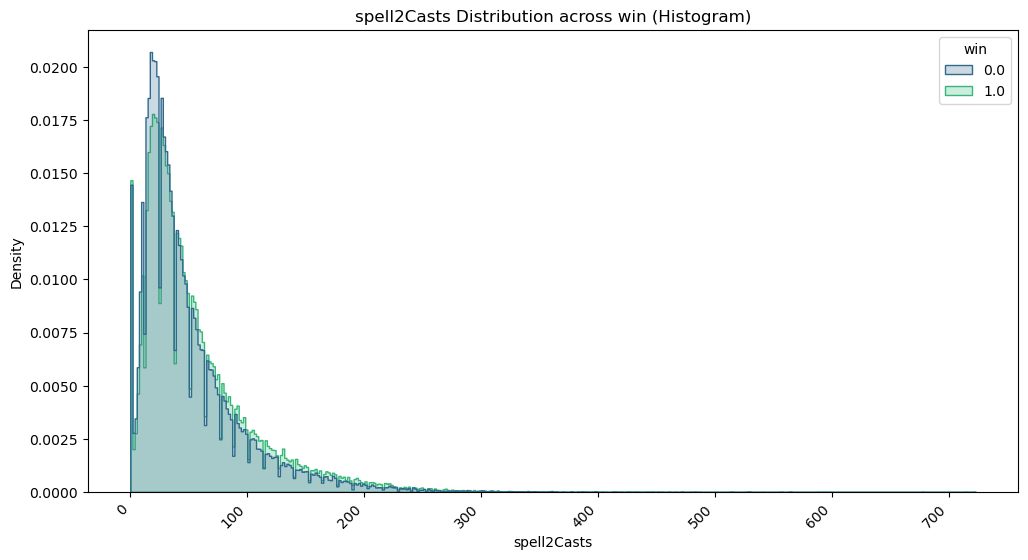

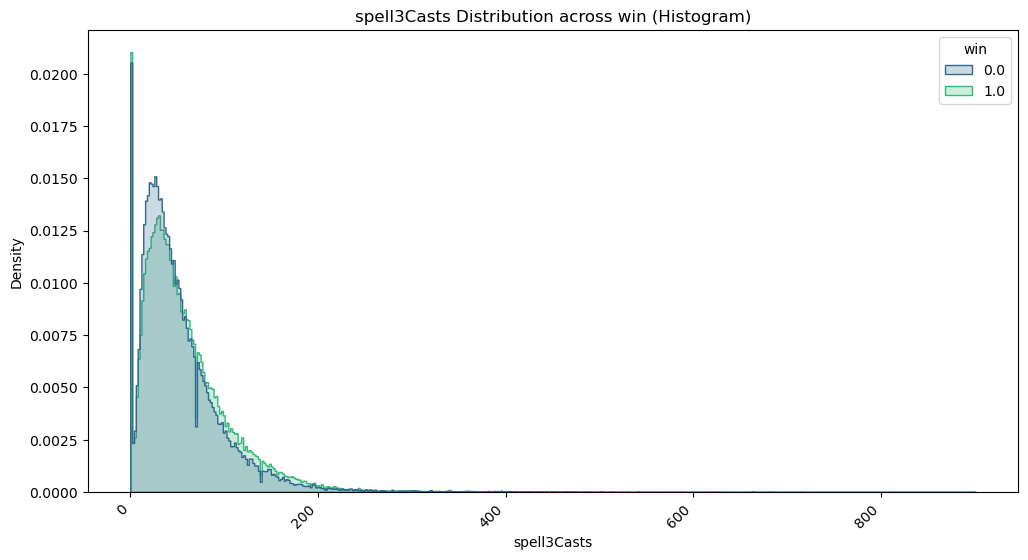

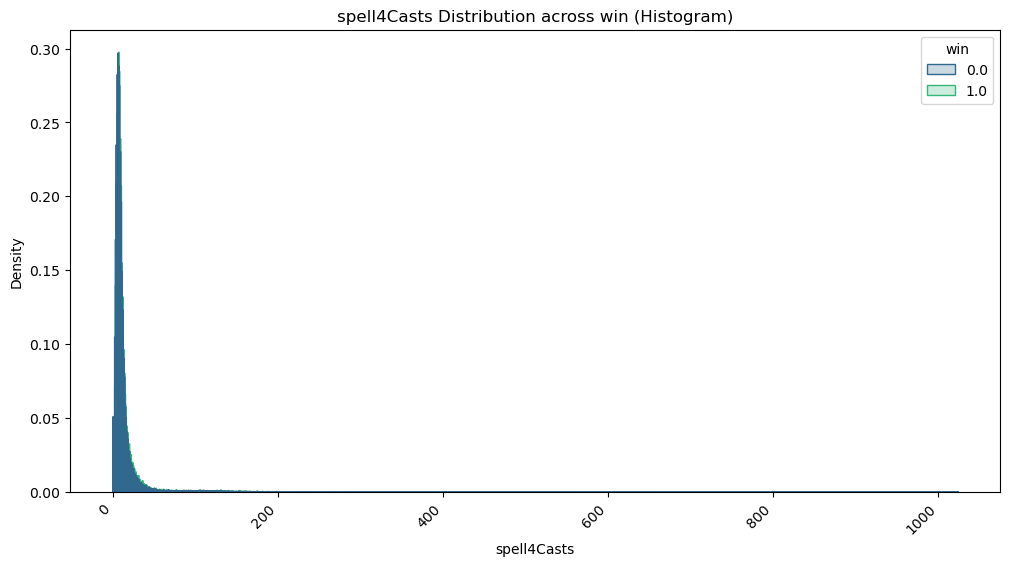

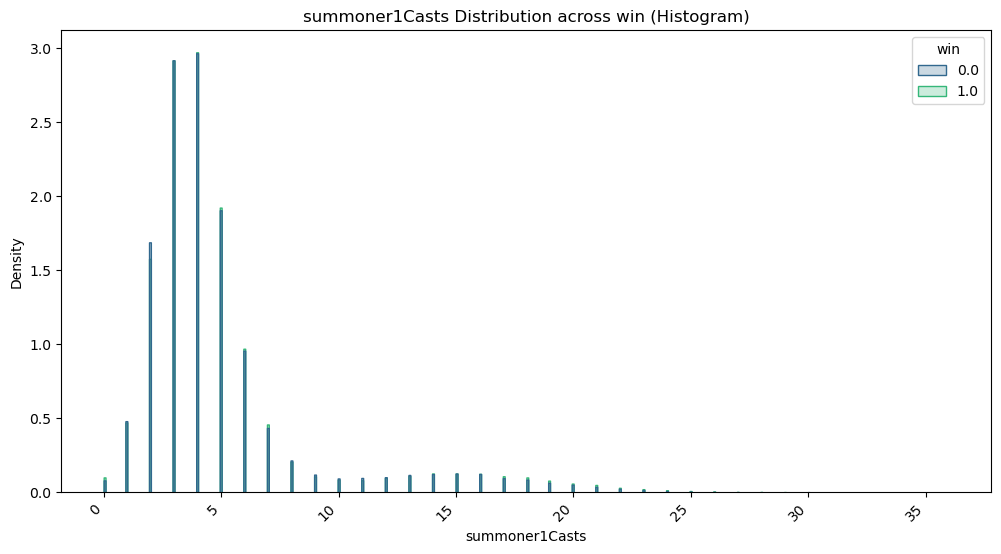

In [ ]:
league_of_legends_hist(league_of_legends_df)

In [ ]:
# the probleme here is that each of the metrics depends on the champ u played for example if u are playing a support role with a support champ u will not deal damage but tank it for your team and thats how u will win 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def league_of_legends_bar_plot(df, win_column='win'):
    non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
    
    for column in non_numeric_columns:
        plt.figure(figsize=(12, 6))
        
        sns.countplot(x=column, hue=win_column, data=df, palette='viridis')
        plt.title(f'Wins and Losses Distribution for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [ ]:
league_of_legends_bar_plot(league_of_legends_df)

we see that role and team position and individual postion dosen't havea  greate effect on the winning or losing 

In [31]:
league_of_legends_df.drop(['individualPosition','teamPosition','role','lane'],axis=1,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12752\1876276553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_of_legends_df.drop(['individualPosition','teamPosition','role','lane'],axis=1,inplace=True)


In [32]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np




# Split the data into training and testing sets
X = league_of_legends_df.drop(['win'], axis=1).values  # Features
y = league_of_legends_df['win'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the fully connected neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history=model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test accuracy: {test_accuracy}')





Epoch 1/10


757/757 [==============================] - 2s 1ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 2/10
757/757 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 3/10
757/757 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5007
Epoch 4/10
757/757 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 5/10
757/757 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 6/10
757/757 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.5007
Epoch 7/10
757/757 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.4993
E

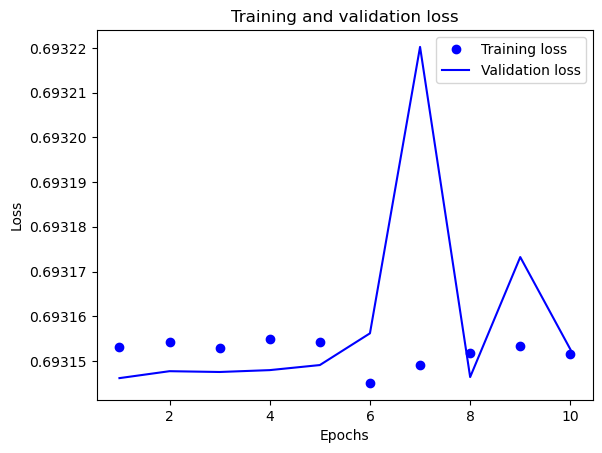

In [34]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

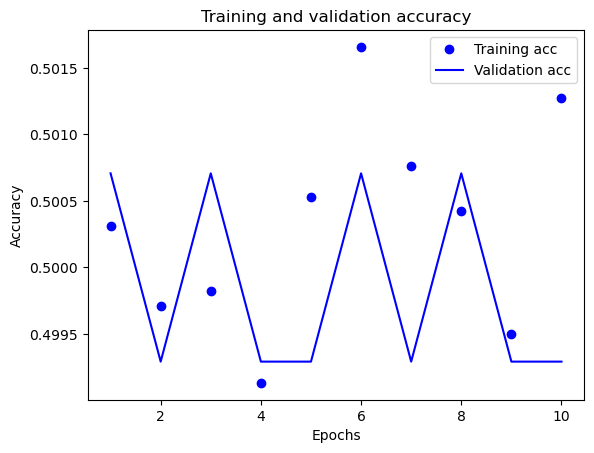

In [35]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()